In [173]:
import sys
import os
sys.path.append (os.path.abspath("../utils/"))
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Análisis del dataset y limpieza base

In [174]:
df = pd.read_csv("./../data/heart_2022_with_nans.csv")
df.head(10)

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Never smoked,Not at all (right now),No,"White only, Non-Hispanic",Age 80 or older,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 55 to 59,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",NaN,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 40 to 44,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
5,Alabama,Male,Poor,1.0,0.0,Within past year (anytime less than 12 months ...,No,7.0,NaN,Yes,No,Yes,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.80,84.82,26.08,No,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No
6,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Former smoker,Never used e-cigarettes in my entire life,No,"Black only, Non-Hispanic",Age 80 or older,1.65,62.60,22.96,Yes,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
7,Alabama,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 80 or older,1.63,73.48,27.81,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
8,Alabama,Female,Good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,NaN,No,No,No,No,Yes,No,No,No,Yes,No,No,Yes,No,Yes,No,No,Former smoker,Not at all (right now),NaN,"White only, Non-Hispanic",Age 75 to 79,1.70,NaN,NaN,No,Yes,No,No,"Yes, received tetanus shot but not sure what type",No,No
9,Alabama,Female,Good,1.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,No,No,No,No,No,No,Yes,No,Yes,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,NaN,"White only, Non-Hispanic",Age 70 to 74,1.68,81.65,29.05,Yes,NaN,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [175]:
df.info() #Hay variables tanto categóricas, como numéricas como booleanas.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [176]:
df.shape

(445132, 40)

In [177]:
df.columns #Al ser un dataset de gran dimensión, queremos ver todas las variables que contiene, ya que a simple vista no se ven todas

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [178]:
print (df["Sex"].value_counts())
print (df["Sex"].value_counts(normalize=True)*100)

Sex
Female    235893
Male      209239
Name: count, dtype: int64
Sex
Female    52.993943
Male      47.006057
Name: proportion, dtype: float64


## Análisis de variables

|Columna|Descripción|Tipo|Categorías|
|:-----:|:-----:|:-----:|:-----:|
|State|Estado de residencia de la persona encuestada en USA|Categórica nominal|Estados y territorios de USA|
|Sex|Género de la persona encuestada|Categórica nominal|Female, Male|
|General Health|Estado general de la salud|Categórica ordinal|Poor,Fair,Good,Very good,Excellent|
|Physical Health Days|Días con mala salud física de los últimos 30 días|Numérica discreta|Días(0-30)|
|Mental Health Days|Días con mala salud mental de los últimos 30 días|Numérica discreta|Días(0-30)|
|Last Checkup Time|Tiempo desde el último chequeo|Categórica ordinal|<1 year, 1-2 years, >5 years, Never|
|Physical Activities|Si realiza actividad física o no|Booleana|Yes/No|
|Sleep Hours|Horas de sueño diario|Numérica continua|Horas|
|Removed Teeth|Cantidad de dientes quitados|Categórica ordinal|NaN,1-5,6+,All|
|Had Heart Attack|Si ha sufrido o no un ataque al corazón|Booleana|Yes/No|
|Had Angina|Si ha sufrido una angina de pecho|Booleana|Yes/No|
|Had Stroke|Si ha sufrido un derrame cerebral|Booleana|Yes/No|
|Had Asthma|Si tiene asma o no|Booleana|Yes/No|
|Had Skin Cancer|Si ha sufrido cáncer de piel|Booleana|Yes/No|
|Had COPD|Si tiene EPOC|Booleana|Yes/No|
|Had Depressive Disorder|Si ha sido diagnosticado de trastorno depresivo|Booleana|Yes/No|
|Had Kidney Disease|Si tiene problemas renales|Booleana|Yes/No|
|Had Arthritis|Diagnóstico de artritis|Booleana|Yes/No|
|Had Diabetes|Diagnóstico de diabetes|Categórica nominal|Yes, No, Borderline, During Pregnancy|
|Deaf Or Hard Of Hearing|Problemas auditivos|Booleana|Yes/No|
|Blind Or Vision Difficulty|Problemas visuales|Booleana|Yes/No|
|Difficulty Concentrating|Dificultad para concentrarse|Booleana|Yes/No|
|Difficulty Walking|Dificultad para andar|Booleana|Yes/No|
|Difficulty Dressing Bathing|Dificultad para vestirse o bañarse|Booleana|Yes/No|
|Difficulty Errands|Dificultad para realizar recados solo|Booleana|Yes/No|
|Smoker Status|Estado respecto al hábito de fumar|Categórica ordinal|Never, Former, Current (some days), Current (every day)|
|ECigarette Usage|Uso de cigarrillos electrónicos|Categórica ordinal|Never, Former, Current (some days), Current (every day)|
|Chest Scan|Se se ha realizado un escáner torácico|Booleana|Yes/No|
|Race Ethnicity Category|Grupo racial o étnico|Categórica nominal|White, Black, Hispanic, etc.|
|Age Category|Edad de la persona encuestada|Categórica ordinal|Rangos de edad|
|Height In Meters|Altura de la persona encuestada|Numérica continua|Metros|
|Weight In Kilograms|Peso de la persona encuestada|Numérica continua|kg|
|BMI|Índice de Masa Corporal|Numérica continua|kg|
|Alcohol Drinkers|Consumo de alcohol|Booleana|Yes/No|
|HIV Testing|Si se ha realizado el test de VIH|Booleana|Yes/No|
|Flu Vax Last 12|Si se ha puesto la vacuna de la gripe en los últimos 12 meses|Booleana|Yes/No|
|Pneumo Vax Ever|Si le han puesto la vacuna neumocócica alguna vez|Booleana|Yes/No|
|Tetanus Last 10 Tdap|Si le han puesto la vacuna antitetánica (Tdap) en los últimos 10 años|Categórica nominal|Yes, No, Don't know|
|High Risk Last Year|Conductas de alto riesgo durante el último año|Booleana|Yes/No|
|CovidPos|Resultado positivo en una prueba de COVID-19|Categórica nominal|Yes, No, Don't know|



In [179]:
total_nulos = df.isna().sum().sum() #Queremos saber el número total de nulos del dataset
total_nulos

np.int64(902665)

In [180]:
print ((df.isna().sum().sort_values(ascending=False))) #Vemos cual es la variable que más nulos tiene


TetanusLast10Tdap            82516
PneumoVaxEver                77040
HIVTesting                   66127
ChestScan                    56046
CovidPos                     50764
HighRiskLastYear             50623
BMI                          48806
FluVaxLast12                 47121
AlcoholDrinkers              46574
WeightInKilograms            42078
ECigaretteUsage              35660
SmokerStatus                 35462
HeightInMeters               28652
DifficultyErrands            25656
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
BlindOrVisionDifficulty      21564
DeafOrHardOfHearing          20647
RaceEthnicityCategory        14057
RemovedTeeth                 11360
PhysicalHealthDays           10927
AgeCategory                   9079
MentalHealthDays              9067
LastCheckupTime               8308
SleepHours                    5453
HadAngina                     4405
HadSkinCancer                 3143
HadHeartAttack      

In [181]:
total_celdas = df.shape[0]*df.shape[1] #Vemos el % total de nulos de todo el dataset
porcentaje_nulos = (total_nulos/total_celdas)*100
round (porcentaje_nulos,2)

np.float64(5.07)

In [182]:
print (df.duplicated().sum())

157


In [183]:
df["HadHeartAttack"].value_counts() #Primer análisis de personas que han tenido infarto según su género

HadHeartAttack
No     416959
Yes     25108
Name: count, dtype: int64

In [184]:
df_infarto = df[df["HadHeartAttack"] == "Yes"].groupby(["Sex","AgeCategory"]).size().sort_values(ascending=False) #Y lo comparamos con la categoría de edad
df_infarto

Sex     AgeCategory    
Male    Age 80 or older    2796
        Age 70 to 74       2758
        Age 65 to 69       2419
        Age 75 to 79       2352
Female  Age 80 or older    2228
Male    Age 60 to 64       1825
Female  Age 70 to 74       1458
        Age 75 to 79       1437
        Age 65 to 69       1281
Male    Age 55 to 59       1180
Female  Age 60 to 64       1065
        Age 55 to 59        780
Male    Age 50 to 54        748
Female  Age 50 to 54        502
Male    Age 45 to 49        423
Female  Age 45 to 49        305
Male    Age 40 to 44        261
Female  Age 40 to 44        184
Male    Age 35 to 39        177
Female  Age 35 to 39        141
Male    Age 30 to 34        110
        Age 18 to 24         82
Female  Age 30 to 34         77
Male    Age 25 to 29         67
Female  Age 25 to 29         52
        Age 18 to 24         40
dtype: int64

## Notas primer análisis y limpieza base

- En este primer análisis del dataset, podemos observar que hay un total de 40 columnas y 445.132 filas.

- El total de valores nulos es de 889.788. La categoría que tiene más nulos es la de Tetanus Last 10Tdap.

- De estos valores nulos (NaN), tenemos que decidir qué hacer con ellos, ya que sería interesante reemplazar solo algunos valores por "UNK". De otros, como por ejemplo los que están en las variables numéricas, podríamos calcularlo en base a la mediana.

- Encontramos un total de 157 valores duplicados, por lo que vamos a decir qué vamos a hacer con ellos.

- El porcentaje de respuesta entre hombres y mujeres está muy igualado (53% vs 47%)

## Detección de errores

- Muchas de las columnas donde hay valores numéricos (Sleep Hours, Age Category, Physical Health Days, Mental Health Days, etc. son booleanos. Quitar el 0 y dejarlo como un entero)

- Los nombres de las columnas no tienen espacios. Sería ideal añadirle marcar una diferencia entre las dos palabras con un guion bajo: _

## Limpieza y transformación del dataset

In [185]:
df["State"].value_counts()

State
Washington              26152
New York                17800
Minnesota               16821
Ohio                    16487
Maryland                16418
Texas                   14245
Florida                 13393
Wisconsin               11276
Kansas                  11247
Massachusetts           11029
California              10952
Maine                   10646
Indiana                 10466
Virginia                10417
Arizona                 10185
Michigan                10058
South Carolina          10037
Utah                     9826
Connecticut              9784
Colorado                 9365
Georgia                  9236
Iowa                     8949
Vermont                  8811
New Jersey               8209
Hawaii                   7747
Nebraska                 7473
Missouri                 7438
South Dakota             7424
Montana                  7048
New Hampshire            6757
Idaho                    6280
Rhode Island             5893
Alaska                   5865
Okla

In [186]:
df["Sex"].value_counts()

Sex
Female    235893
Male      209239
Name: count, dtype: int64

In [187]:
df["GeneralHealth"].value_counts()

GeneralHealth
Very good    148444
Good         143598
Excellent     71878
Fair          60273
Poor          19741
Name: count, dtype: int64

In [188]:
df["PhysicalHealthDays"].value_counts()

PhysicalHealthDays
0.0     267819
30.0     33082
2.0      25256
1.0      17250
3.0      15948
5.0      15315
10.0     10589
7.0       9348
15.0      8787
4.0       8462
20.0      5421
14.0      5029
6.0       2538
25.0      2181
8.0       1761
12.0      1111
21.0      1038
28.0       751
9.0        411
29.0       365
18.0       271
16.0       255
27.0       188
17.0       185
13.0       162
11.0       161
22.0       140
24.0       125
26.0       109
23.0        99
19.0        48
Name: count, dtype: int64

In [189]:
df["MentalHealthDays"].value_counts()


MentalHealthDays
0.0     265229
30.0     26990
2.0      23785
5.0      19951
10.0     15414
3.0      15345
15.0     14519
1.0      14409
20.0      9150
4.0       7943
7.0       7844
25.0      3078
14.0      2871
6.0       2305
8.0       1749
12.0      1259
28.0       910
21.0       549
29.0       502
9.0        322
18.0       319
16.0       280
17.0       244
27.0       241
22.0       193
13.0       169
24.0       124
11.0       121
26.0       106
23.0        97
19.0        47
Name: count, dtype: int64

In [190]:
df["LastCheckupTime"].value_counts()

LastCheckupTime
Within past year (anytime less than 12 months ago)         350944
Within past 2 years (1 year but less than 2 years ago)      41919
Within past 5 years (2 years but less than 5 years ago)     24882
5 or more years ago                                         19079
Name: count, dtype: int64

In [191]:
df["PhysicalActivities"].value_counts()

PhysicalActivities
Yes    337559
No     106480
Name: count, dtype: int64

In [192]:
df["SleepHours"].value_counts()

SleepHours
7.0     132927
8.0     125442
6.0      95880
5.0      30122
9.0      21210
4.0      12433
10.0     10459
3.0       3260
12.0      3004
2.0       1549
1.0       1154
11.0       686
16.0       329
15.0       317
14.0       295
18.0       168
13.0       165
20.0       143
24.0        52
17.0        27
22.0        19
23.0        18
19.0        16
21.0         4
Name: count, dtype: int64

In [193]:
df["RemovedTeeth"].value_counts()

RemovedTeeth
None of them              233455
1 to 5                    129294
6 or more, but not all     45570
All                        25453
Name: count, dtype: int64

In [194]:
df["HadHeartAttack"].value_counts()

HadHeartAttack
No     416959
Yes     25108
Name: count, dtype: int64

In [195]:
df["HadAngina"].value_counts()

HadAngina
No     414176
Yes     26551
Name: count, dtype: int64

In [196]:
df["HadStroke"].value_counts()

HadStroke
No     424336
Yes     19239
Name: count, dtype: int64

In [197]:
df["HadAsthma"].value_counts()

HadAsthma
No     376665
Yes     66694
Name: count, dtype: int64

In [198]:
df["HadSkinCancer"].value_counts()

HadSkinCancer
No     406504
Yes     35485
Name: count, dtype: int64

In [199]:
df["HadCOPD"].value_counts()

HadCOPD
No     407257
Yes     35656
Name: count, dtype: int64

In [200]:
df["HadDepressiveDisorder"].value_counts()

HadDepressiveDisorder
No     350910
Yes     91410
Name: count, dtype: int64

In [201]:
df["HadKidneyDisease"].value_counts()

HadKidneyDisease
No     422891
Yes     20315
Name: count, dtype: int64

In [202]:
df["HadArthritis"].value_counts()

HadArthritis
No     291351
Yes    151148
Name: count, dtype: int64

In [203]:
df["HadDiabetes"].value_counts()

HadDiabetes
No                                         368722
Yes                                         61158
No, pre-diabetes or borderline diabetes     10329
Yes, but only during pregnancy (female)      3836
Name: count, dtype: int64

In [204]:
df["DeafOrHardOfHearing"].value_counts()

DeafOrHardOfHearing
No     385539
Yes     38946
Name: count, dtype: int64

In [205]:
df["BlindOrVisionDifficulty"].value_counts()

BlindOrVisionDifficulty
No     399910
Yes     23658
Name: count, dtype: int64

In [206]:
df["DifficultyConcentrating"].value_counts()

DifficultyConcentrating
No     370792
Yes     50100
Name: count, dtype: int64

In [207]:
df["DifficultyWalking"].value_counts()

DifficultyWalking
No     353039
Yes     68081
Name: count, dtype: int64

In [208]:
df["DifficultyDressingBathing"].value_counts()

DifficultyDressingBathing
No     404404
Yes     16813
Name: count, dtype: int64

In [209]:
df["DifficultyErrands"].value_counts()

DifficultyErrands
No     387029
Yes     32447
Name: count, dtype: int64

In [210]:
df["SmokerStatus"].value_counts()

SmokerStatus
Never smoked                             245955
Former smoker                            113774
Current smoker - now smokes every day     36003
Current smoker - now smokes some days     13938
Name: count, dtype: int64

In [211]:
df["ECigaretteUsage"].value_counts()

ECigaretteUsage
Never used e-cigarettes in my entire life    311988
Not at all (right now)                        75368
Use them some days                            11734
Use them every day                            10382
Name: count, dtype: int64

In [212]:
df["ChestScan"].value_counts()

ChestScan
No     223221
Yes    165865
Name: count, dtype: int64

In [213]:
df["RaceEthnicityCategory"].value_counts()

RaceEthnicityCategory
White only, Non-Hispanic         320421
Hispanic                          42917
Black only, Non-Hispanic          35446
Other race only, Non-Hispanic     22713
Multiracial, Non-Hispanic          9578
Name: count, dtype: int64

In [214]:
df["AgeCategory"].value_counts()

AgeCategory
Age 65 to 69       47099
Age 60 to 64       44511
Age 70 to 74       43472
Age 55 to 59       36821
Age 80 or older    36251
Age 50 to 54       33644
Age 75 to 79       32518
Age 40 to 44       29942
Age 45 to 49       28531
Age 35 to 39       28526
Age 18 to 24       26941
Age 30 to 34       25807
Age 25 to 29       21990
Name: count, dtype: int64

In [215]:
df["HeightInMeters"].value_counts()

HeightInMeters
1.68    36782
1.63    35622
1.70    34038
1.65    32785
1.78    32038
        ...  
0.92        1
1.33        1
2.02        1
1.94        1
0.95        1
Name: count, Length: 109, dtype: int64

In [216]:
df["WeightInKilograms"].value_counts()

WeightInKilograms
90.72     21311
81.65     19709
68.04     17595
72.57     17177
77.11     15979
          ...  
223.17        1
152.00        1
233.60        1
193.23        1
189.00        1
Name: count, Length: 599, dtype: int64

In [217]:
df["BMI"].value_counts()

BMI
26.63    4262
27.46    3277
24.41    3188
27.44    3128
27.12    3123
         ... 
48.03       1
38.56       1
42.64       1
59.20       1
82.17       1
Name: count, Length: 3985, dtype: int64

In [218]:
df["AlcoholDrinkers"].value_counts()

AlcoholDrinkers
Yes    210891
No     187667
Name: count, dtype: int64

In [219]:
df["HIVTesting"].value_counts()

HIVTesting
No     249919
Yes    129086
Name: count, dtype: int64

In [220]:
df["FluVaxLast12"].value_counts()

FluVaxLast12
Yes    209256
No     188755
Name: count, dtype: int64

In [221]:
df["PneumoVaxEver"].value_counts()

PneumoVaxEver
No     215604
Yes    152488
Name: count, dtype: int64

In [222]:
df["TetanusLast10Tdap"].value_counts()

TetanusLast10Tdap
No, did not receive any tetanus shot in the past 10 years    121493
Yes, received tetanus shot but not sure what type            113725
Yes, received Tdap                                            99943
Yes, received tetanus shot, but not Tdap                      27455
Name: count, dtype: int64

In [223]:
df["HighRiskLastYear"].value_counts()

HighRiskLastYear
No     377324
Yes     17185
Name: count, dtype: int64

In [224]:
df["CovidPos"].value_counts()

CovidPos
No                                                               270055
Yes                                                              110877
Tested positive using home test without a health professional     13436
Name: count, dtype: int64

In [225]:
# Imputamos los NaN de columnas categóricas con la moda

categorical_columns = [
    "Sex",
    "State",
    "RaceEthnicityCategory",
    "SmokerStatus",
    "ECigaretteUsage",
    "RemovedTeeth",
    "GeneralHealth",
    "LastCheckupTime",
    "TetanusLast10Tdap",
    "AgeCategory"
]

for col in categorical_columns:
    moda = df[col].mode(dropna=True)

    if not moda.empty:
        df[col] = df[col].fillna(moda.iloc[0])

In [226]:
# Imputamos los de las columnas binarias

binary_columns = binary_columns = [
    "PhysicalActivities",
    "HadHeartAttack",
    "HadAngina",
    "HadStroke",
    "HadAsthma",
    "HadSkinCancer",
    "HadCOPD",
    "HadDepressiveDisorder",
    "HadKidneyDisease",
    "HadArthritis",
    "DeafOrHardOfHearing",
    "BlindOrVisionDifficulty",
    "DifficultyConcentrating",
    "DifficultyWalking",
    "DifficultyDressingBathing",
    "DifficultyErrands",
    "ChestScan",
    "AlcoholDrinkers",
    "HIVTesting",
    "FluVaxLast12",
    "PneumoVaxEver",
    "HighRiskLastYear"
]

for col in binary_columns:
    df[col] = df[col].fillna("No")

In [227]:
# Imputamos los de las columnas numéricas

numeric_columns = [
    "SleepHours",
    "WeightInKilograms",
    "HeightInMeters",
    "BMI",
    "PhysicalHealthDays",
    "MentalHealthDays"
]

for col in numeric_columns:
    mediana = df[col].median()
    df[col] = df[col].fillna(mediana)

In [228]:
df.isna().sum()

State                            0
Sex                              0
GeneralHealth                    0
PhysicalHealthDays               0
MentalHealthDays                 0
LastCheckupTime                  0
PhysicalActivities               0
SleepHours                       0
RemovedTeeth                     0
HadHeartAttack                   0
HadAngina                        0
HadStroke                        0
HadAsthma                        0
HadSkinCancer                    0
HadCOPD                          0
HadDepressiveDisorder            0
HadKidneyDisease                 0
HadArthritis                     0
HadDiabetes                   1087
DeafOrHardOfHearing              0
BlindOrVisionDifficulty          0
DifficultyConcentrating          0
DifficultyWalking                0
DifficultyDressingBathing        0
DifficultyErrands                0
SmokerStatus                     0
ECigaretteUsage                  0
ChestScan                        0
RaceEthnicityCategor

In [229]:
# Convertimos Sex a tipo category
# Esto no cambia los valores, solo le dice a pandas que es una variable categórica con valores fijos

df["Sex"] = df["Sex"].astype("category")

In [230]:
# Lo mismo con State

df["State"] = df["State"].astype("category")

In [231]:
# Creamos una columna binaria adicional para HadDiabetes:
# 1 = Tiene diabetes (incluye embarazo)
# 0 = No tiene diabetes

df["HadDiabetes_binary"] = np.where(df["HadDiabetes"].isin(["Yes", "Yes, but only during pregnancy (female)"]), 1, 0)

# El np.where es bastante curioso e interesante porque funciona como un True/False. Me lo apunto para comentárselos en la próxima videocall

In [232]:
# Convertimos las columnas Yes/No a 1/0

yes_no_columns = ["PhysicalActivities",
    "HadHeartAttack",
    "HadAngina",
    "HadStroke",
    "HadSkinCancer",
    "HadAsthma",
    "HadCOPD",
    "HadDepressiveDisorder",
    "HadKidneyDisease",
    "HadArthritis",
    "DeafOrHardOfHearing",
    "BlindOrVisionDifficulty",
    "DifficultyConcentrating",
    "DifficultyWalking",
    "DifficultyDressingBathing",
    "DifficultyErrands",
    "ChestScan",
    "AlcoholDrinkers",
    "HIVTesting",
    "FluVaxLast12",
    "PneumoVaxEver",
    "HighRiskLastYear"]

for col in yes_no_columns:
    df[col] = df[col].map({"Yes": 1, "No": 0})

In [233]:
# Convertimos GeneralHealth a numérica ordinal (existe un orden lógico)

df["GeneralHealth"] = df["GeneralHealth"].map({
    "Poor": 1, 
    "Fair": 2, 
    "Good": 3, 
    "Very good": 4, 
    "Excellent": 5})

In [234]:
# Lo mismo con LastCheckupTime

df["LastCheckupTime"] = df["LastCheckupTime"].map({
    "Within past year (anytime less than 12 months ago)": 1,
    "Within past 2 years (1 year but less than 2 years ago)": 2,
    "Within past 5 years (2 years but less than 5 years ago)": 3,
    "5 or more years ago": 4
})

In [235]:
# Lo mismo con RemovedTeeth

df["RemovedTeeth"] = df["RemovedTeeth"].map({
    "None of them": 0,
    "1 to 5": 1,
    "6 or more, but not all": 2,
    "All": 3
})

In [236]:
# Lo mismo con SmokerStatus

df["SmokerStatus"] = df["SmokerStatus"].map({
    "Never smoked": 0,
    "Former smoker": 1,
    "Current smoker - now smokes some days": 2,
    "Current smoker - now smokes every day": 3
})

In [237]:
# Lo mismo con ECigaretteUsage

df["ECigaretteUsage"] = df["ECigaretteUsage"].map({
    "Never used e-cigarettes in my entire life": 0,
    "Not at all (right now)": 1,
    "Use them some days": 2,
    "Use them every day": 3
})

In [238]:
# Marcamos valores fuera del rango "típico" como missing para HeightInMeters

df.loc[
    (df["HeightInMeters"] < 1.3) | (df["HeightInMeters"] > 2.3),
    "HeightInMeters"
] = np.nan

In [239]:
# Lo mismo con WeightInKilograms

df.loc[
    (df["WeightInKilograms"] < 30) | (df["WeightInKilograms"] > 250),
    "WeightInKilograms"
] = np.nan

In [240]:
# Creamos una columna categórica adicional para BMI

def bmi_category(bmi):
    if pd.isna(bmi):
        return np.nan
    elif bmi < 18.5:
        return "Underweight"
    elif bmi < 25:
        return "Normal"
    elif bmi < 30:
        return "Overweight"
    else:
        return "Obese"
    
df["BMI_category"] = df["BMI"].apply(bmi_category) 

# Una manera nueva y bastante curiosa e interesante de "llamar" a una función
# En lugar de llamarla y "meter" la columa como argumento, mencionamos la columna y le "enchufamos" la función

In [241]:
# Unimos todos los positivos en una columna binaria adicional para CovidPos

df["CovidPos_binary"] = np.where(df["CovidPos"].isin(["Yes", "Tested positive using home test without a health professional"]), 1, 0)

In [242]:
df.isna().sum()

# HadDiabetes tiene 1,087 nulos. 
# Pero como creamos la columna HadDiabetes_binary y en esa nueva columna ya no hay nulos, podemos usarla sin problema.

# HeightInMeters tiene 284 nulos. 
# Esto pasa porque los valores fuera del rango (1.3–2.3 m) los tratamos como missing (NaN).
# Esos NaN no son errores, solo datos fuera de ese rango "típico".
# Más adelante, tendremos que decidir, según el análisis, si dejarlos como NaN o si imputar la mediana.

# WeightInKilograms tiene 106 nulos.
# Lo mismo que con HeightInMeters.

# CovidPos tiene 50,764 nulos.
# Pero como creamos la columna CovidPos_binary, pasa lo mismo que con HadDiabetes.

State                            0
Sex                              0
GeneralHealth                    0
PhysicalHealthDays               0
MentalHealthDays                 0
LastCheckupTime                  0
PhysicalActivities               0
SleepHours                       0
RemovedTeeth                     0
HadHeartAttack                   0
HadAngina                        0
HadStroke                        0
HadAsthma                        0
HadSkinCancer                    0
HadCOPD                          0
HadDepressiveDisorder            0
HadKidneyDisease                 0
HadArthritis                     0
HadDiabetes                   1087
DeafOrHardOfHearing              0
BlindOrVisionDifficulty          0
DifficultyConcentrating          0
DifficultyWalking                0
DifficultyDressingBathing        0
DifficultyErrands                0
SmokerStatus                     0
ECigaretteUsage                  0
ChestScan                        0
RaceEthnicityCategor

In [243]:
df.to_csv("./../data/heart_2022_cleaned.csv", index = False)

## Análisis univariante

In [244]:
df = pd.read_csv ("./../data/heart_2022_cleaned.csv")
pd.set_option("display.max_columns", None)
df.head(5)

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos,HadDiabetes_binary,BMI_category,CovidPos_binary
0,Alabama,Female,4,0.0,0.0,1,0,8.0,0,0,0,0,0,0,0,0,0,0,Yes,0,0,0,0,0,0,0,1,0,"White only, Non-Hispanic",Age 80 or older,1.70,80.74,27.44,0,0,1,0,"Yes, received tetanus shot but not sure what type",0,No,1,Overweight,0
1,Alabama,Female,5,0.0,0.0,1,0,6.0,0,0,0,0,0,1,0,0,0,0,No,0,0,0,0,0,0,0,0,0,"White only, Non-Hispanic",Age 80 or older,1.60,68.04,26.57,0,0,0,0,"No, did not receive any tetanus shot in the pa...",0,No,0,Overweight,0
2,Alabama,Female,4,2.0,3.0,1,1,5.0,0,0,0,0,0,1,0,0,0,0,No,0,0,0,0,0,0,0,0,0,"White only, Non-Hispanic",Age 55 to 59,1.57,63.50,25.61,0,0,0,0,"No, did not receive any tetanus shot in the pa...",0,Yes,0,Overweight,1
3,Alabama,Female,5,0.0,0.0,1,1,7.0,0,0,0,0,1,0,0,0,0,1,No,0,0,0,0,0,0,2,0,1,"White only, Non-Hispanic",Age 65 to 69,1.65,63.50,23.30,0,0,1,1,"No, did not receive any tetanus shot in the pa...",0,No,0,Normal,0
4,Alabama,Female,2,2.0,0.0,1,1,9.0,0,0,0,0,0,0,0,0,0,0,No,0,0,0,0,0,0,0,0,1,"White only, Non-Hispanic",Age 40 to 44,1.57,53.98,21.77,1,0,0,1,"No, did not receive any tetanus shot in the pa...",0,No,0,Normal,0


In [245]:
df_copy = df.copy()

In [246]:
df_copy.shape

(445132, 43)

In [247]:
borrar_columnas =[
    "State",
    "PhysicalHealthDays",
    "MentalHealthDays",
    "RemovedTeeth",
    "HadStroke",
    "HadAsthma",
    "HadSkinCancer",
    "HadCOPD",
    "HadDepressiveDisorder",
    "HadKidneyDisease",
    "HadArthritis",
    "HadDiabetes",
    "DeafOrHardOfHearing",
    "BlindOrVisionDifficulty",
    "DifficultyConcentrating",
    "DifficultyWalking",
    "DifficultyDressingBathing",
    "DifficultyErrands",
    "ChestScan",
    "RaceEthnicityCategory",
    "HeightInMeters",
    "WeightInKilograms",
    "BMI",
    "HIVTesting",
    "FluVaxLast12",
    "PneumoVaxEver",
    "TetanusLast10Tdap",
    "HighRiskLastYear",
    "CovidPos",
    "CovidPos_binary"]

In [248]:
df_copy.drop(columns=borrar_columnas,inplace=True)

In [249]:
print (df_copy.shape)
display (df_copy)

(445132, 13)


,Sex,GeneralHealth,LastCheckupTime,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,SmokerStatus,ECigaretteUsage,AgeCategory,AlcoholDrinkers,HadDiabetes_binary,BMI_category
0,Female,4,1,0,8.0,0,0,0,1,Age 80 or older,0,1,Overweight
1,Female,5,1,0,6.0,0,0,0,0,Age 80 or older,0,0,Overweight
2,Female,4,1,1,5.0,0,0,0,0,Age 55 to 59,0,0,Overweight
3,Female,5,1,1,7.0,0,0,2,0,Age 65 to 69,0,0,Normal
4,Female,2,1,1,9.0,0,0,0,0,Age 40 to 44,1,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445127,Female,3,2,1,6.0,0,0,0,0,Age 18 to 24,0,0,Overweight
445128,Female,5,1,1,7.0,0,0,0,0,Age 50 to 54,0,0,Overweight
445129,Female,1,4,0,5.0,0,0,3,2,Age 65 to 69,0,0,Underweight
445130,Male,4,1,0,5.0,1,0,0,0,Age 70 to 74,0,0,Obese


In [250]:
num_cols = df_copy.select_dtypes(include = "number").columns #Creamos un listado de todas las columnas numéricas
cat_cols = df_copy.select_dtypes (exclude = "number").columns #Creamos un listado de todas las columnas categóricas

In [251]:
df_copy[num_cols].describe().T
#Con este código podemos observar la media de cada variable, que nos puede ayudar a obtener resultados como media de personas que han tenido
#un ataque al corazón, media de edad, de horas dormidas, entre otras. 
#También podemos observar la mediana (50%)

,count,mean,std,min,25%,50%,75%,max
GeneralHealth,445132.0,3.435024,1.051491,1.0,3.0,3.0,4.0,5.0
LastCheckupTime,445132.0,1.334552,0.769151,1.0,1.0,1.0,1.0,4.0
PhysicalActivities,445132.0,0.758335,0.428093,0.0,1.0,1.0,1.0,1.0
SleepHours,445132.0,7.022701,1.493196,1.0,6.0,7.0,8.0,24.0
HadHeartAttack,445132.0,0.056406,0.230704,0.0,0.0,0.0,0.0,1.0
HadAngina,445132.0,0.059647,0.236833,0.0,0.0,0.0,0.0,1.0
SmokerStatus,445132.0,0.560865,0.891185,0.0,0.0,0.0,1.0,3.0
ECigaretteUsage,445132.0,0.292008,0.631983,0.0,0.0,0.0,0.0,3.0
AlcoholDrinkers,445132.0,0.473772,0.499312,0.0,0.0,0.0,1.0,1.0
HadDiabetes_binary,445132.0,0.146011,0.353117,0.0,0.0,0.0,0.0,1.0


In [252]:
df_copy[cat_cols].describe().T
#Con este código podemos observar los valores únicos de cada variable, etc 

,count,unique,top,freq
Sex,445132,2,Female,235893
AgeCategory,445132,13,Age 65 to 69,56178
BMI_category,445132,4,Overweight,188801


In [253]:
cat_cols = [
    "Sex",
    "AgeCategory",
    "BMI_category"]

In [254]:
df[cat_cols].mode().T

,0
Sex,Female
AgeCategory,Age 65 to 69
BMI_category,Overweight


In [255]:
def pinta_distribucion_categoricas(df_copy, cat_cols, relativa=False, mostrar_valores=False):
    num_columnas = len(cat_cols)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(10, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(cat_cols):
        ax = axes[i]
        if relativa:
            total = df_copy[col].value_counts().sum()
            serie = df_copy[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df_copy[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('Categorías dentro de las variables')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [256]:
for catego in cat_cols: #Frecuencia absoluta
    print (f" Para {catego}")
    print (df_copy[catego].value_counts())
    print ("\n"*2)

 Para Sex
Sex
Female    235893
Male      209239
Name: count, dtype: int64



 Para AgeCategory
AgeCategory
Age 65 to 69       56178
Age 60 to 64       44511
Age 70 to 74       43472
Age 55 to 59       36821
Age 80 or older    36251
Age 50 to 54       33644
Age 75 to 79       32518
Age 40 to 44       29942
Age 45 to 49       28531
Age 35 to 39       28526
Age 18 to 24       26941
Age 30 to 34       25807
Age 25 to 29       21990
Name: count, dtype: int64



 Para BMI_category
BMI_category
Overweight     188801
Obese          132577
Normal         116976
Underweight      6778
Name: count, dtype: int64





In [257]:
for catego in cat_cols: #Frecuencia relativa
    print (f" Para {catego}")
    print (df_copy[catego].value_counts()/len(df_copy)*100)
    print ("\n"*2)

 Para Sex
Sex
Female    52.993943
Male      47.006057
Name: count, dtype: float64



 Para AgeCategory
AgeCategory
Age 65 to 69       12.620526
Age 60 to 64        9.999506
Age 70 to 74        9.766092
Age 55 to 59        8.271928
Age 80 or older     8.143876
Age 50 to 54        7.558207
Age 75 to 79        7.305249
Age 40 to 44        6.726544
Age 45 to 49        6.409559
Age 35 to 39        6.408436
Age 18 to 24        6.052362
Age 30 to 34        5.797606
Age 25 to 29        4.940108
Name: count, dtype: float64



 Para BMI_category
BMI_category
Overweight     42.414610
Obese          29.783750
Normal         26.278946
Underweight     1.522694
Name: count, dtype: float64





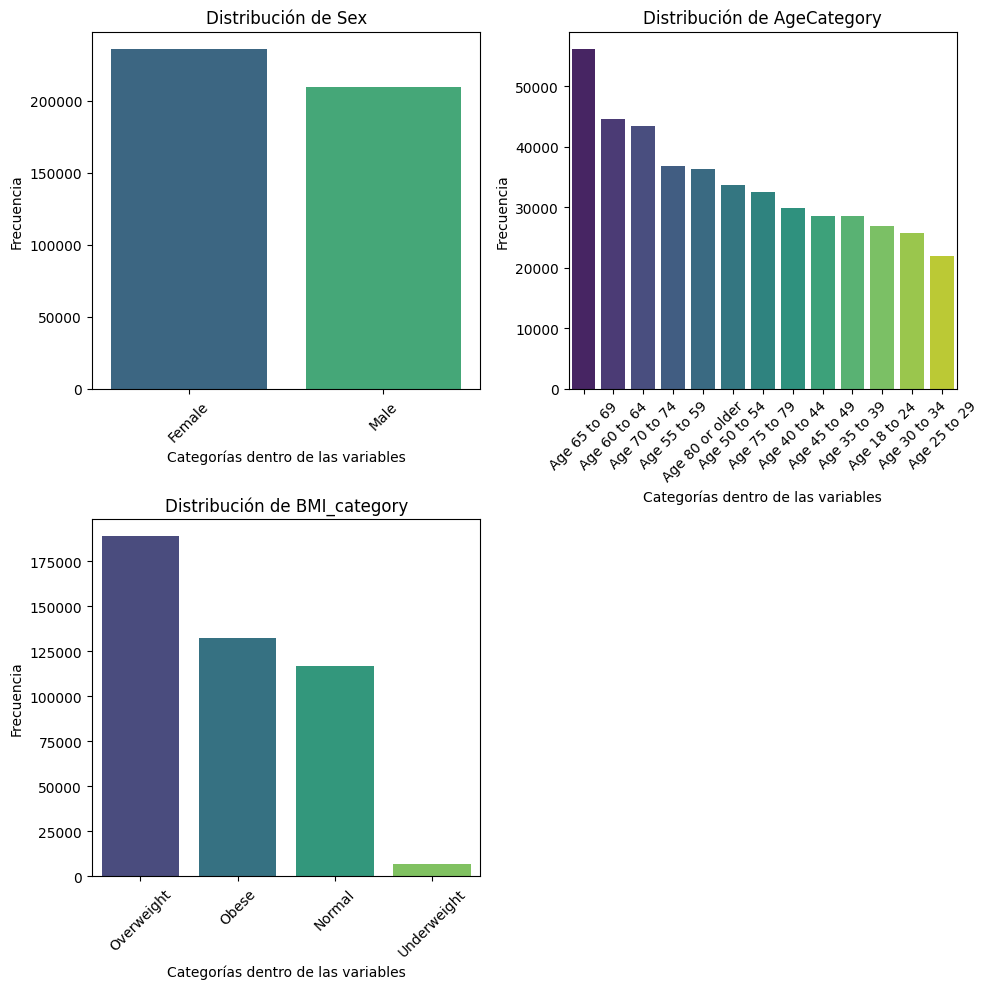

In [258]:
pinta_distribucion_categoricas(df_copy, cat_cols)

#### **Notas columnas categóricas**

1. Hemos realizado una limpieza de las columnas que no son necesarias para hacer nuestro análisis haciendo primero una copia para no modificar el dataset original.
2. Hemos creado dos variables para indicar cuáles son las columnas categóricas (3) y numéricas (10)
3. Gracias a este análisis de columnas categóricas, observamos que hay una mayor representación de mujeres (53%) frente a hombres (47%)
4. En el caso de edad, hay una mayor representación de personas en un rango de edad de 65-69 años (12.62 % de representación)
5. En el caso del IMC, observamos que hay mayor sobrepeso, con una clara diferencia frente a las otras categorías. Deberemos observar si este Overweight puede tener relación con las personas que han tenido un ataque al corazón en el análisis bivariante

## Variables numéricas

Dado que la mayoría de las variables numéricas son discretas o binarias, se ha optado por el uso de boxplots como principal herramienta de análisis univariante, ya que permiten identificar de forma clara la mediana, la dispersión y la presencia de valores atípicos.

In [259]:
num_cols

Index(['GeneralHealth', 'LastCheckupTime', 'PhysicalActivities', 'SleepHours',
       'HadHeartAttack', 'HadAngina', 'SmokerStatus', 'ECigaretteUsage',
       'AlcoholDrinkers', 'HadDiabetes_binary'],
      dtype='object')

In [260]:
def plot_multiple_boxplots(df_copy, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(10, 3 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df_copy, 
                        x=column, 
                        ax=axes[i],
                        color="purple",
                        boxprops = dict(alpha = 0.8))
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [261]:
df_copy.describe()

,GeneralHealth,LastCheckupTime,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,SmokerStatus,ECigaretteUsage,AlcoholDrinkers,HadDiabetes_binary
count,445132.000000,445132.000000,445132.000000,445132.000000,445132.000000,445132.000000,445132.000000,445132.000000,445132.000000,445132.000000
mean,3.435024,1.334552,0.758335,7.022701,0.056406,0.059647,0.560865,0.292008,0.473772,0.146011
std,1.051491,0.769151,0.428093,1.493196,0.230704,0.236833,0.891185,0.631983,0.499312,0.353117
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1.000000,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,1.000000,1.000000,8.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,5.000000,4.000000,1.000000,24.000000,1.000000,1.000000,3.000000,3.000000,1.000000,1.000000


In [262]:
columnas_numericas_EDA = df_copy.describe().T.index.to_list()
print(columnas_numericas_EDA)

['GeneralHealth', 'LastCheckupTime', 'PhysicalActivities', 'SleepHours', 'HadHeartAttack', 'HadAngina', 'SmokerStatus', 'ECigaretteUsage', 'AlcoholDrinkers', 'HadDiabetes_binary']


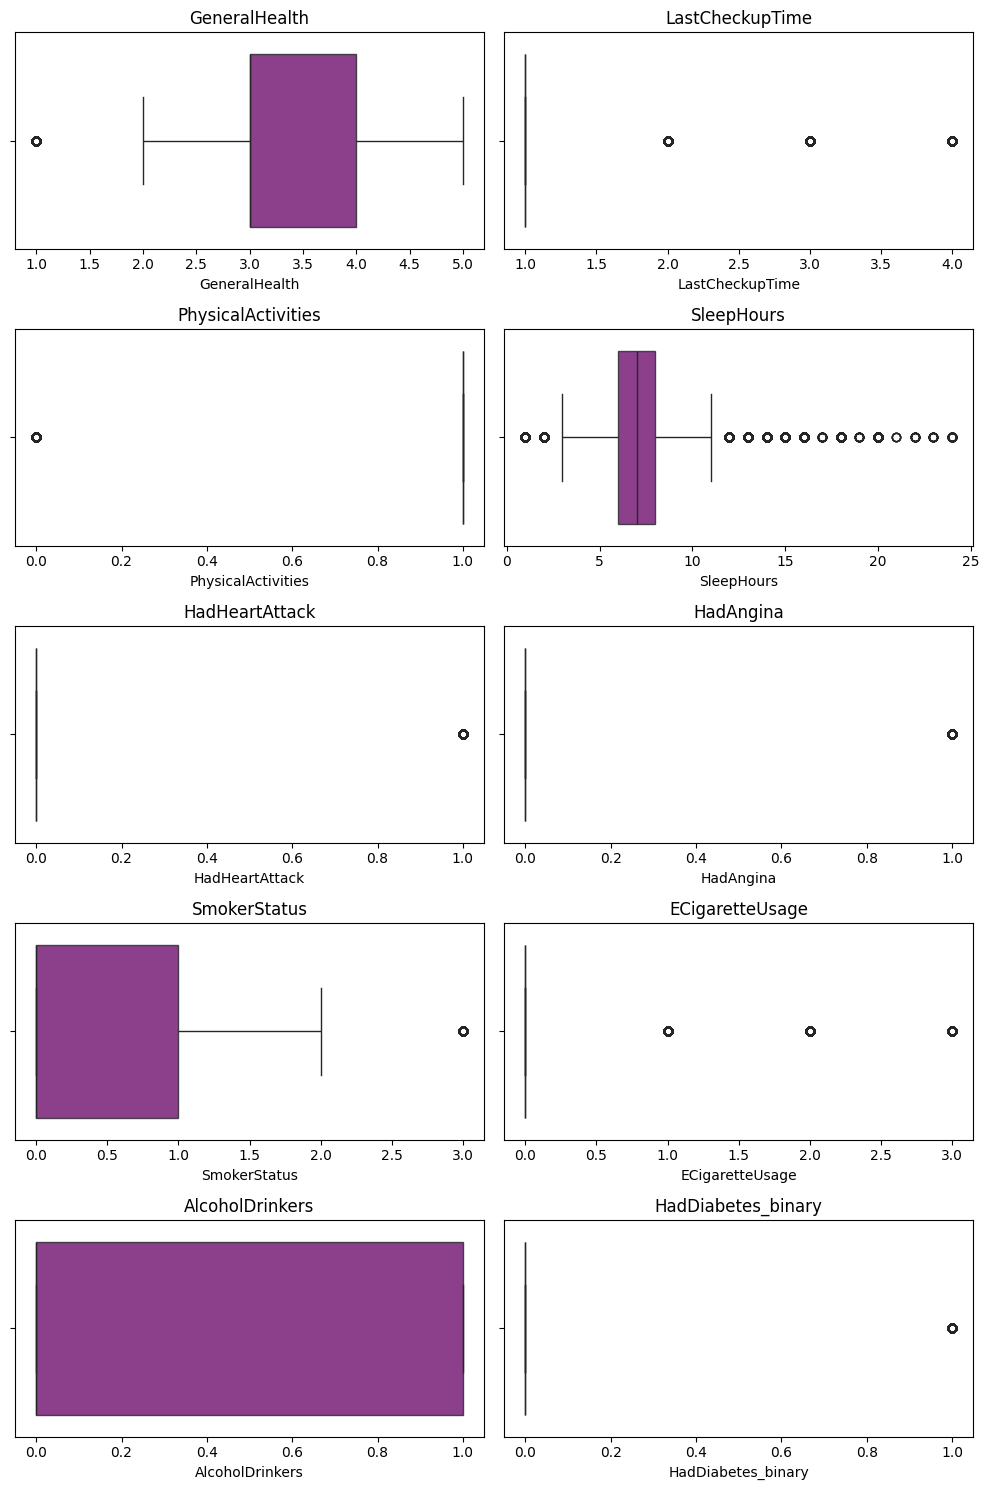

In [263]:
plot_multiple_boxplots(df_copy, columnas_numericas_EDA)

In [264]:
df_copy["HadHeartAttack"].value_counts(normalize=True)*100

HadHeartAttack
0    94.359426
1     5.640574
Name: proportion, dtype: float64

In [265]:
df_copy["HadAngina"].value_counts(normalize=True)*100

HadAngina
0    94.035252
1     5.964748
Name: proportion, dtype: float64

In [266]:
df_copy["SmokerStatus"].value_counts(normalize=True)*100

SmokerStatus
0    63.221022
1    25.559609
3     8.088163
2     3.131206
Name: proportion, dtype: float64

In [267]:
df_copy["ECigaretteUsage"].value_counts(normalize=True)*100

ECigaretteUsage
0    78.099979
1    16.931607
2     2.636072
3     2.332342
Name: proportion, dtype: float64

In [268]:
df_copy["AlcoholDrinkers"].value_counts(normalize=True)*100

AlcoholDrinkers
0    52.622818
1    47.377182
Name: proportion, dtype: float64

In [269]:
df_copy["HadDiabetes_binary"].value_counts(normalize=True)*100

HadDiabetes_binary
0    85.398938
1    14.601062
Name: proportion, dtype: float64

## Notas columnas numéricas

##### *General Health*
1. Observamos que la caja es relativamente estrecha, lo que nos sugiere una baja dispersión ya que la mayoría de los individuos presentan valores similares.
2. Se observa algún valor atípico puntual, pero no distorsiona el comportamiento general de la variable.
3. La distribución de esta variable la consideramos estable y concentrada, ya que no hay una presencia significativa de valores extremos, lo que refuerza la representatividad de la mediana como medida central.

##### *Last Checkup Time*
1. La mediana se sitúa en el valor mínimo, indicando que más del 50% de la población se ha realizado un chequeo médico recientemente.
2. Los puntos aislados representan valores atípicos correspondientes a personas que realizaron el último chequeo hace más tiempo.
3. La variable presenta una distribución muy asimétrica, con una clara concentración en el valor más bajo y pocos casos alejados del comportamiento mayoritario.

##### *Physical Activities*
1. La mediana se sitúa en el valor máximo, lo que indica que la mayoría de los individuos realiza actividad física.
2. Hay muy poca variabilidad y solo hay presencia de algunos puntos aislados, lo cual indican personas sin actividad física.
3. A nivel general, la variable presenta el predominio de un único valor, por lo que la mediana es más representativa que la media.

##### *Sleep Hours*
1. Observamos que la mediana se sitúa alrededor de las 7 horas, un valor bastante saludable.
2. Encontramos numerosos valores atípicos, especialmente en valores altos.
3. La variable presenta una distribución concentrada pero con algunos valores fuera del rango, por lo que la media puede verse influida por los outliers.

##### *Had Heart Attack*
1. La mediana se encuentra en el valor 0, indicando que la gran mayoría de la población no ha sufrido un infarto.
2. Los puntos aislados corresponden a los pocos valores positivos. Comprobando con el value_counts(), observamos que de todas las personas encuestadas, solo un 5.64% han tenido un ataque al corazón.
3. Hay una distribución fuertemente desbalanceada.

##### *Had Angina*
1. Hay un comportamiento muy similar a la variable *HadHeartAttack*.
2. La mediana es 0 y la mayor parte de los valores se concentran en ese valor.
3. Los casos positivos (1) aparecen como valores atípicos.

##### *Smoker Status*
1. La mediana se sitúa en los valores más bajos, indicando que la categoría dominante corresponde a no fumadores o exfumadores.
2. La presencia de valores atípicos en la parte alta indica que algunas categorías de fumadores actuales son poco frecuentes.
3. La variable presenta una distribución asimétrica, dominada por las categorías que tienen un menor consumo de tabaco.

##### *E Cigarette Usage*
1. La mediana se encuentra en el valor mínimo, lo que indica que la mayoría de los individuos no utiliza cigarrillos electrónicos.
2. Los valores atípicos corresponden a niveles de uso poco frecuentes.
3. Se observa una distribución altamente desbalanceada, donde el uso de cigarrillos electrónicos es minoritario dentro de la población analizada. 

##### *Alcohol Drinkers*
1. La distribución es prácticamente equilibrada, con un 52.6% de individuos que no consumen alcohol y un 47% que sí lo hacen.
2. No se observan valores atípicos relevantes ya que ambos valores posibles están bien representados en el gráfico.
3. Esta variable no presenta un desbalanceo significativo. La distribución refleja una población dividida de forma casi equitativa entre consumidores y no consumidores de alcohol.

##### *Had Diabetes Binary*
1. La mediana se sitúa en 0, lo que indica que la mayoría de la población no presenta un diagnóstico de diabetes (solo el 14.6 % tiene diabetes).
2. Los casos positivos aparecen como valores atípicos, evidenciando su carácter minoritario.
3. La diabetes presenta una prevalencia reducida en la muestra, generando una distribución fuertemente desbalanceada.

## Análisis bivariante

In [272]:
from bootcampviztools import (
    pinta_distribucion_categoricas,
    plot_categorical_relationship_fin,
    plot_combined_graphs,
    plot_grouped_histograms,
    plot_grouped_boxplots
)

In [274]:
df = pd.read_csv ("./../data/heart_2022_cleaned.csv")

## Hipótesis 1

Las personas con peor estado de salud general presentan mayor prevalencia de ataques al corazón o angina.

Variables:
1. GeneralHealth
2. HadHeartAttack
3. Had Angina

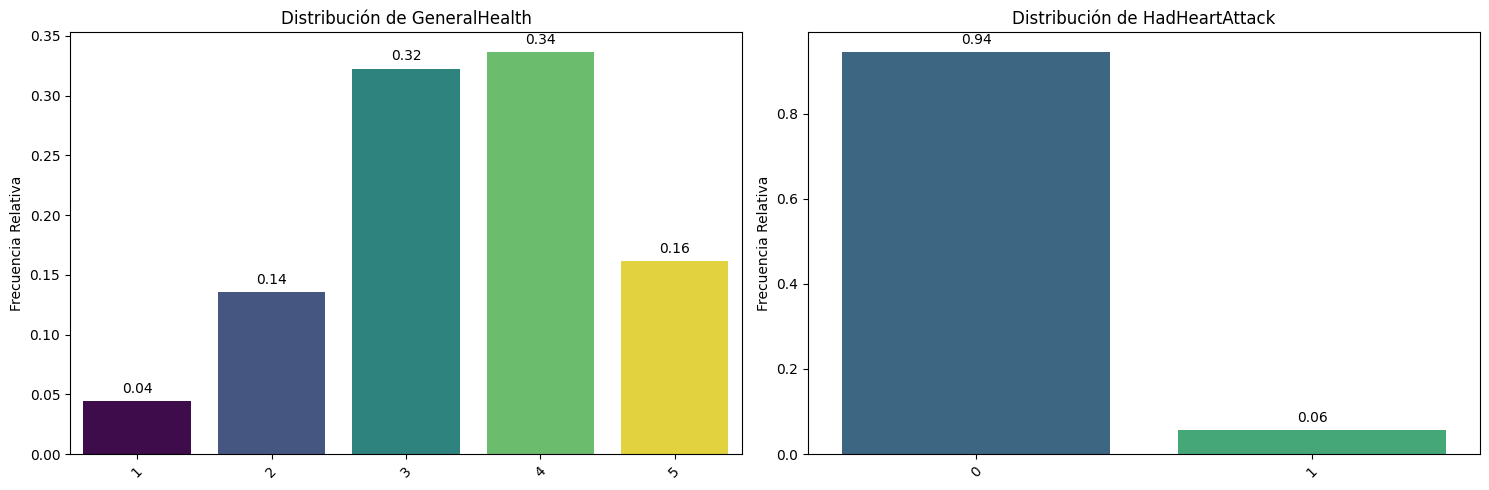

In [275]:
# GeneralHealth vs HadHeartAttack
# Miramos las variables por separado

pinta_distribucion_categoricas(df,["GeneralHealth", "HadHeartAttack"],
                               relativa=True,
                               mostrar_valores=True
                               )

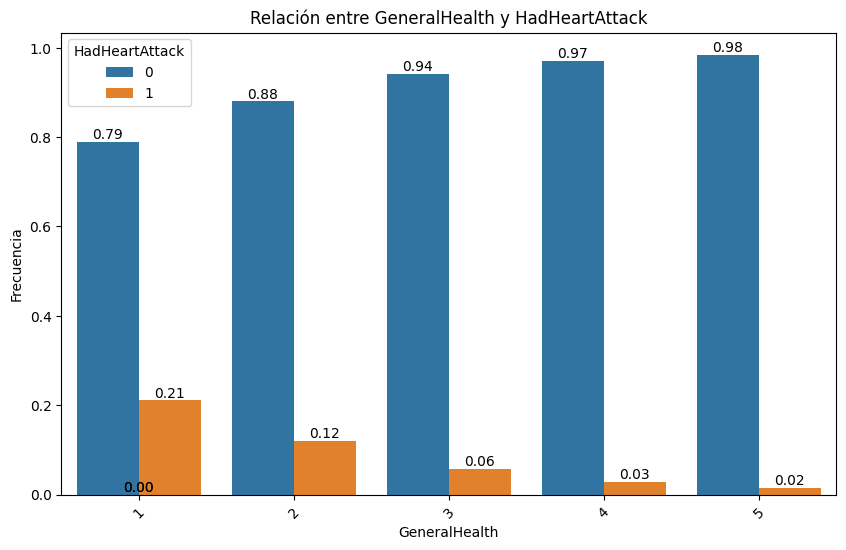

In [276]:
# Miramos su relación

plot_categorical_relationship_fin(df,
                                  "GeneralHealth",
                                  "HadHeartAttack",
                                  relative_freq=True,
                                  show_values=True
                                  )

¿El porcentaje de "Yes" (1) en HadHeartAttack aumenta cuando GeneralHealth es peor (1 = Poor, 5 = Excellent)?

Sí.

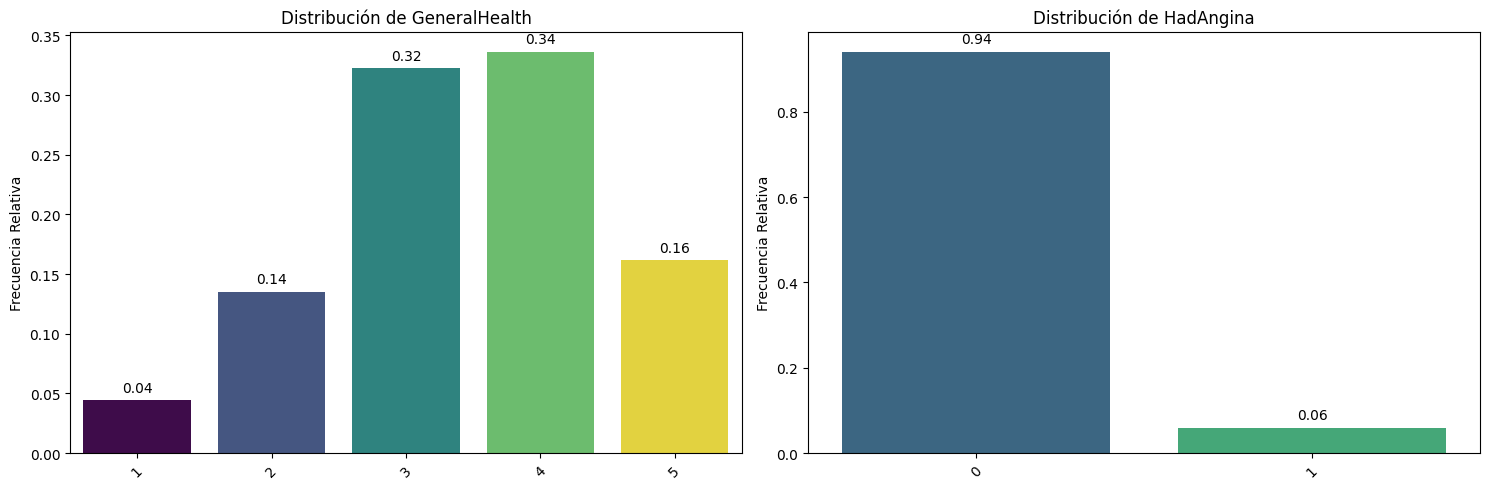

In [277]:
# GeneralHealth vs HadAngina
# Miramos las variables por separado

pinta_distribucion_categoricas(df,["GeneralHealth", "HadAngina"],
                               relativa=True,
                               mostrar_valores=True
                               )

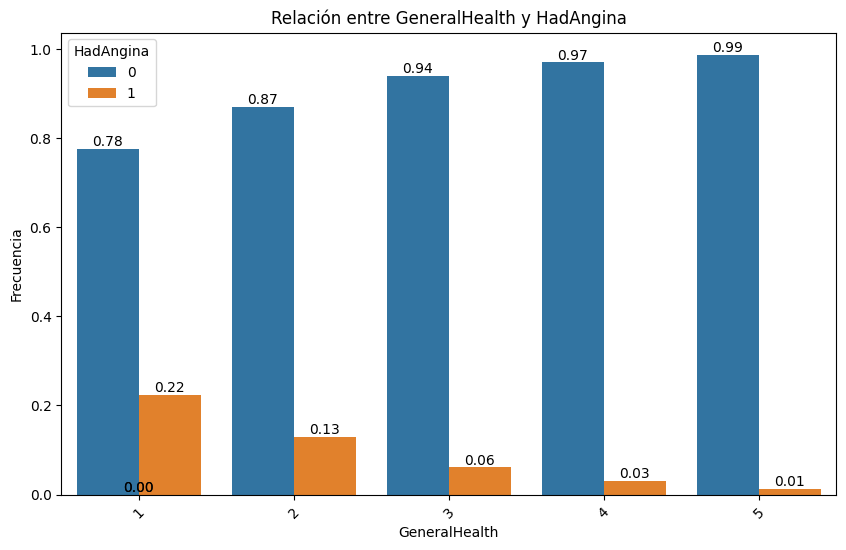

In [278]:
# Miramos su relación

plot_categorical_relationship_fin(df,
                                  "GeneralHealth",
                                  "HadAngina",
                                  relative_freq=True,
                                  show_values=True
                                  )

¿El porcentaje de "Yes" (1) en HadAngina aumenta cuando GeneralHealth es peor (1 = Poor, 5 = Excellent)?

Sí.

## Hipótesis 2

Existen diferencias significativas en problemas cardíacos según sexo y edad.

Variables:
1. Sex
2. AgeCategory
3. HadHeartAttack
4. HadAngina

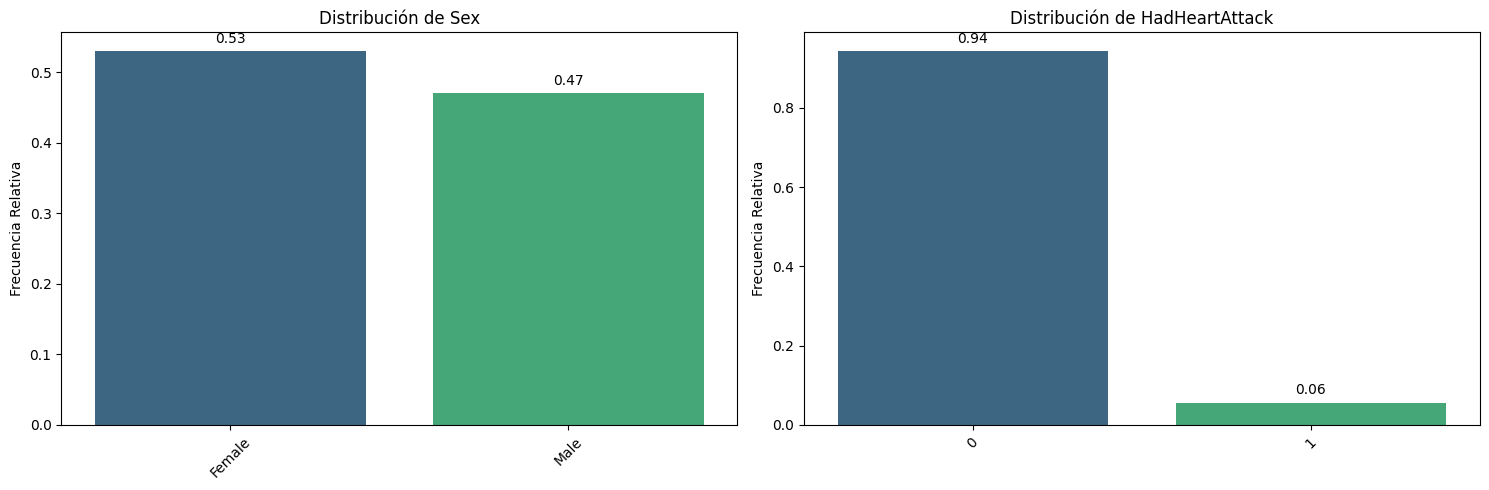

In [279]:
# Sex vs HadHeartAttack
# Miramos las variables por separado

pinta_distribucion_categoricas(df,["Sex", "HadHeartAttack"],
                               relativa=True,
                               mostrar_valores=True
                               )

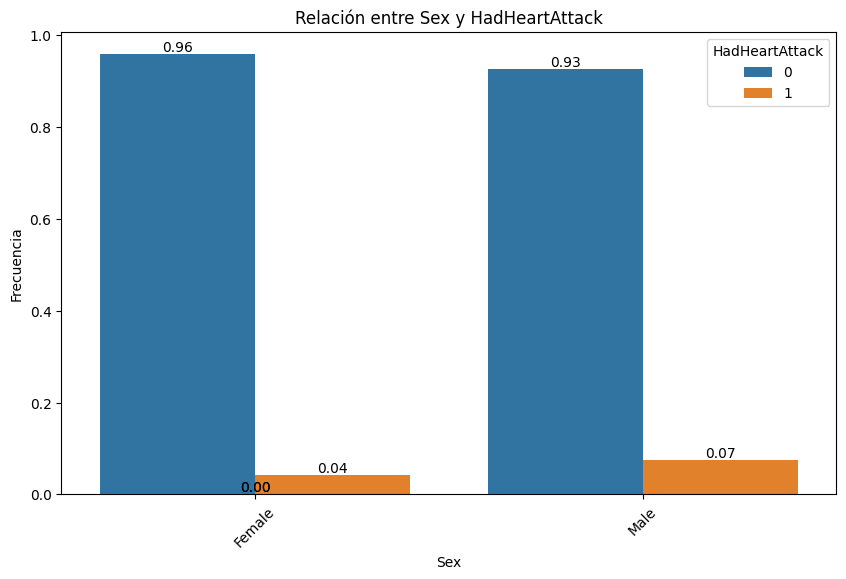

In [280]:
# Miramos su relación

plot_categorical_relationship_fin(df,
                                  "Sex",
                                  "HadHeartAttack",
                                  relative_freq=True,
                                  show_values=True
                                  )

¿El porcentaje de “Yes” (1) en HadHeartAttack es diferente entre hombres y mujeres?

Sí, pero no significativamente.

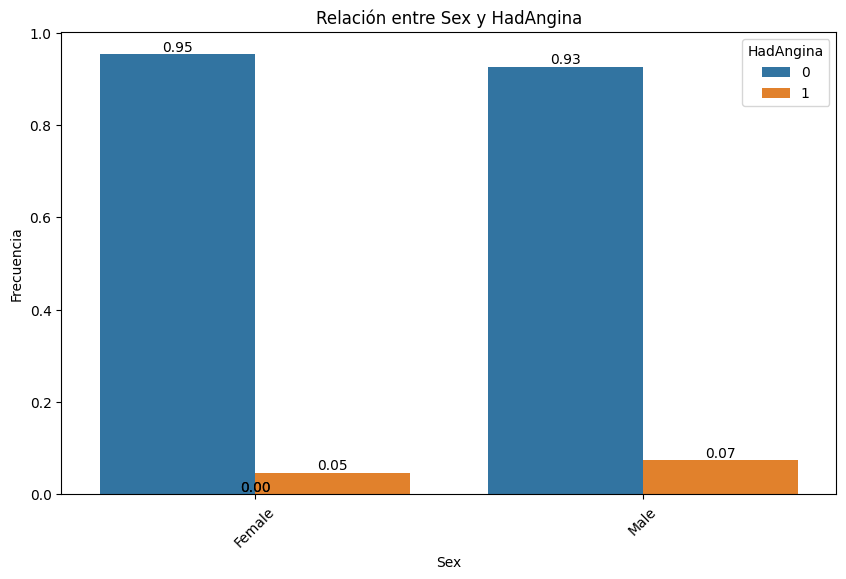

In [281]:
# Sex vs HadAngina
# Miramos su relación

plot_categorical_relationship_fin(df,
                                  "Sex",
                                  "HadAngina",
                                  relative_freq=True,
                                  show_values=True
                                  )

¿El porcentaje de “Yes” (1) en HadAngina es diferente entre hombres y mujeres?

Sí, pero no significativamente.

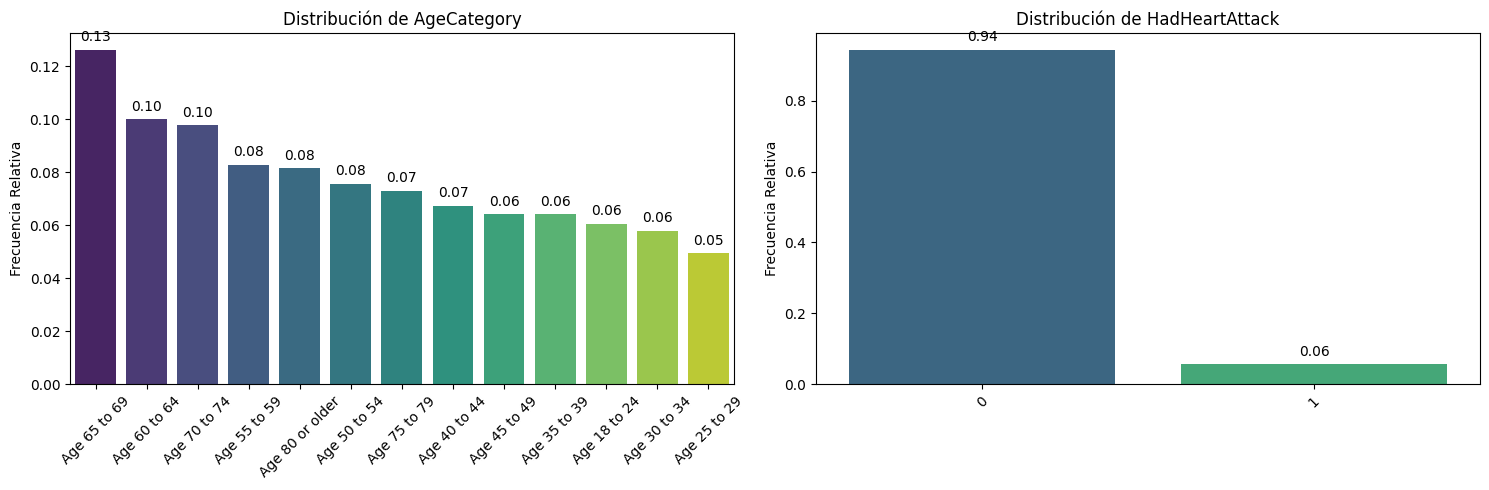

In [282]:
# AgeCategory vs HadHeartAttack
# Miramos las variables por separado

pinta_distribucion_categoricas(df,["AgeCategory", "HadHeartAttack"],
                               relativa=True,
                               mostrar_valores=True
                               )

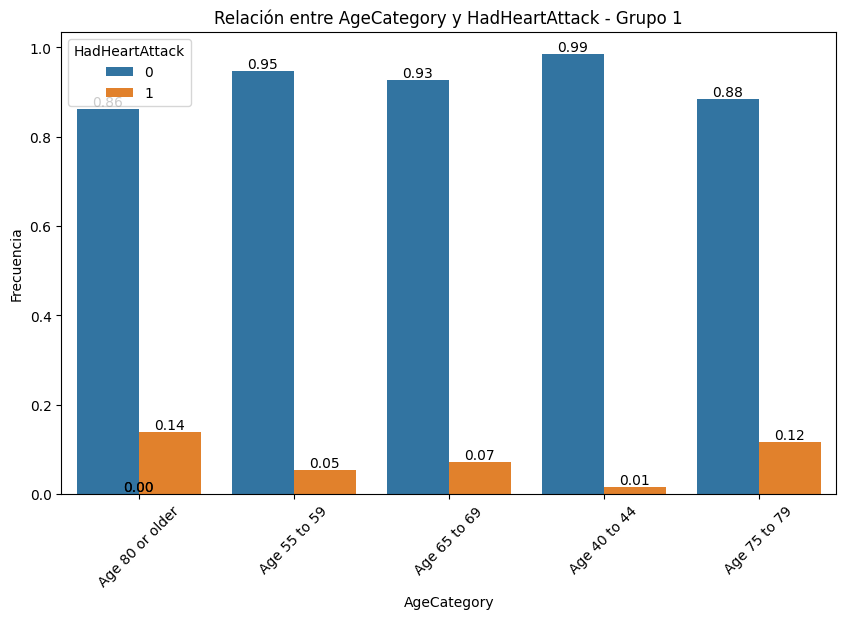

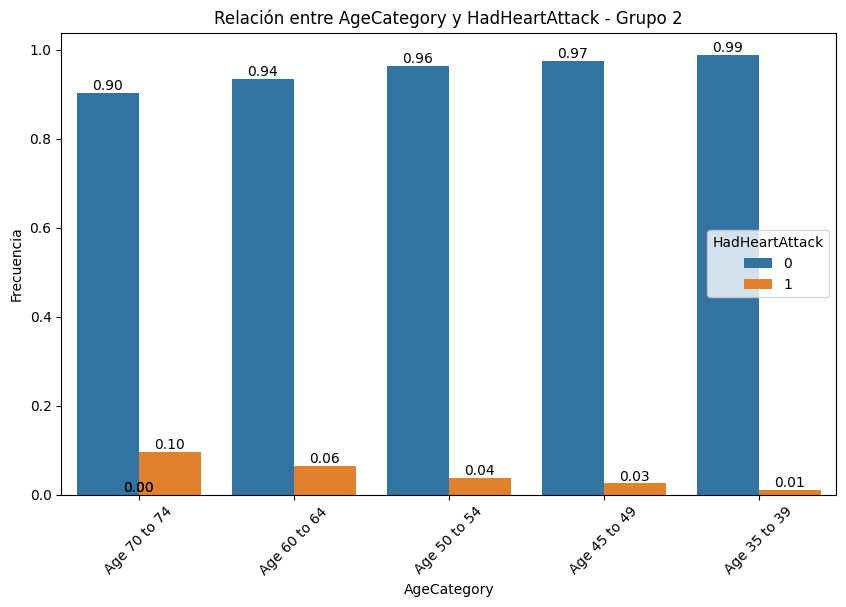

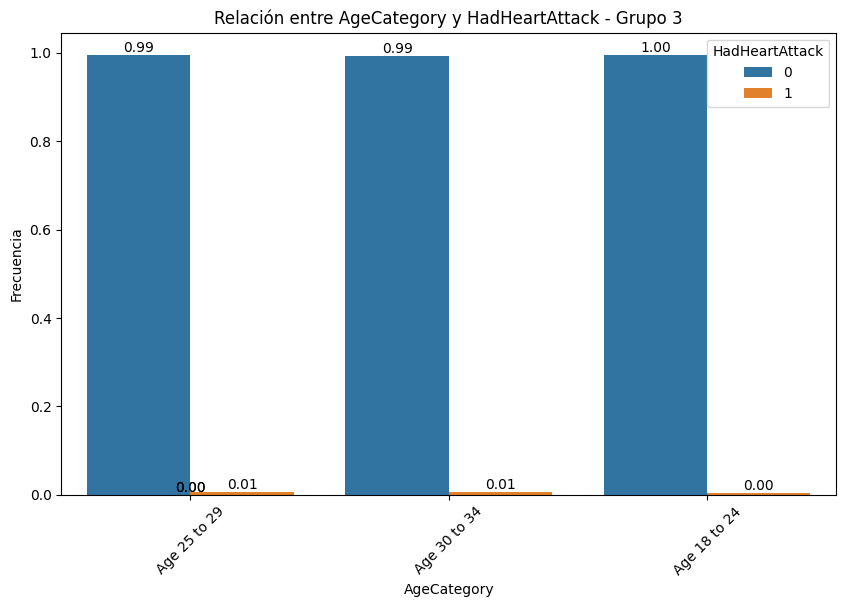

In [283]:
# Miramos su relación

plot_categorical_relationship_fin(df,
                                  "AgeCategory",
                                  "HadHeartAttack",
                                  relative_freq=True,
                                  show_values=True
                                  )

¿El porcentaje de “Yes” (1) en HadHeartAttack aumenta con la edad?

Sí.

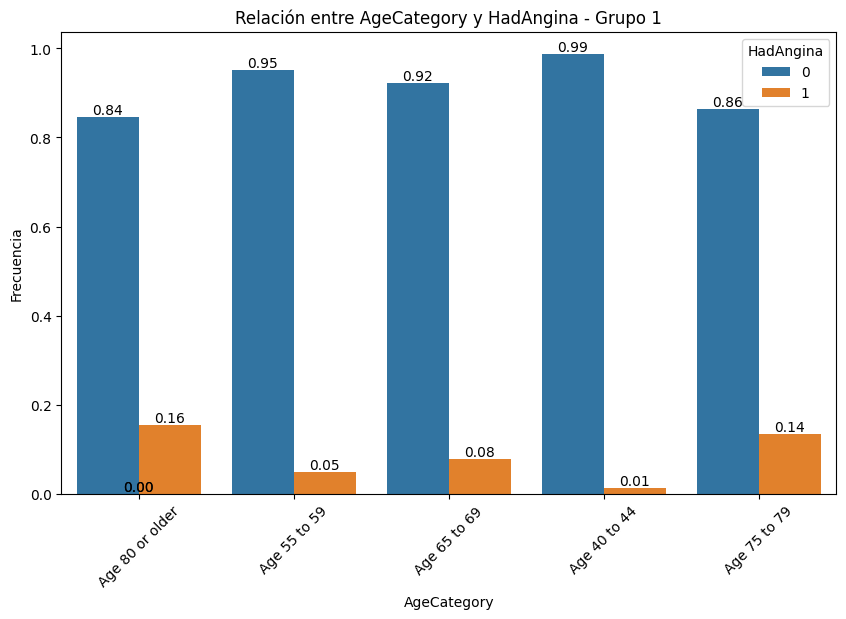

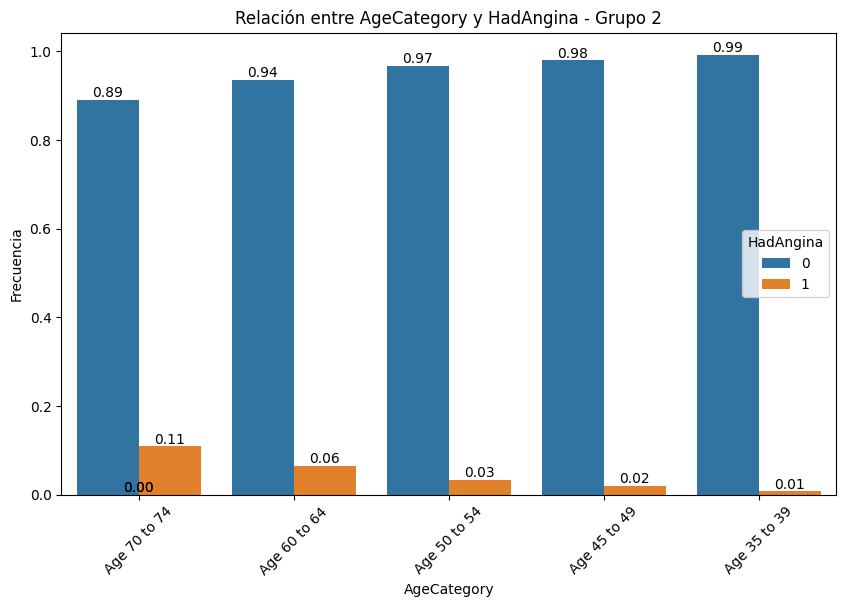

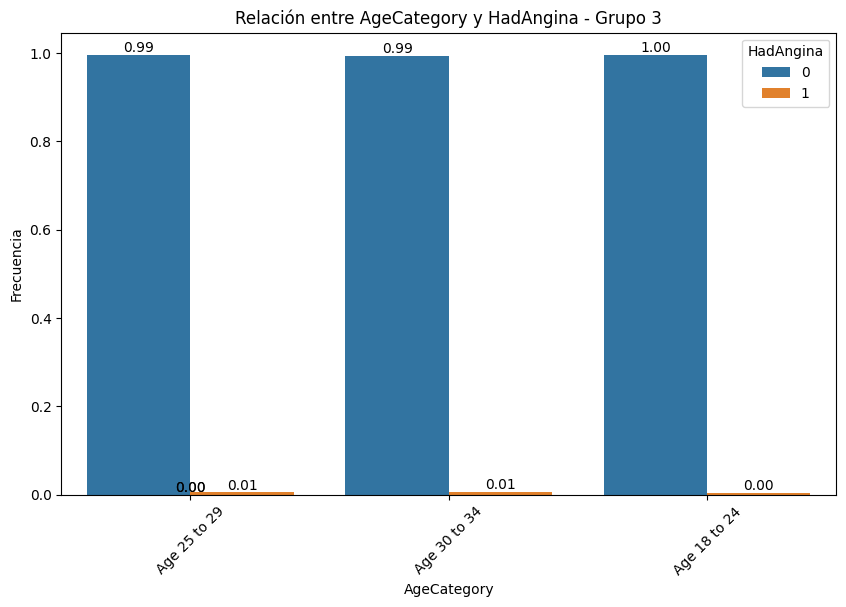

In [284]:
# AgeCategory vs HadAngina
# Miramos su relación

plot_categorical_relationship_fin(df,
                                  "AgeCategory",
                                  "HadAngina",
                                  relative_freq=True,
                                  show_values=True
                                  )

¿El porcentaje de “Yes” (1) en HadAngina aumenta con la edad?

Sí.

## Hipótesis 3

Los hábitos poco saludables están asociados a mayor riesgo cardíaco.

Variables:
1. PhysicalActivities
2. SmokerStatus
3. ECigaretteUsage
4. HadHeartAttack
5. HadAngina
6. SleepHours

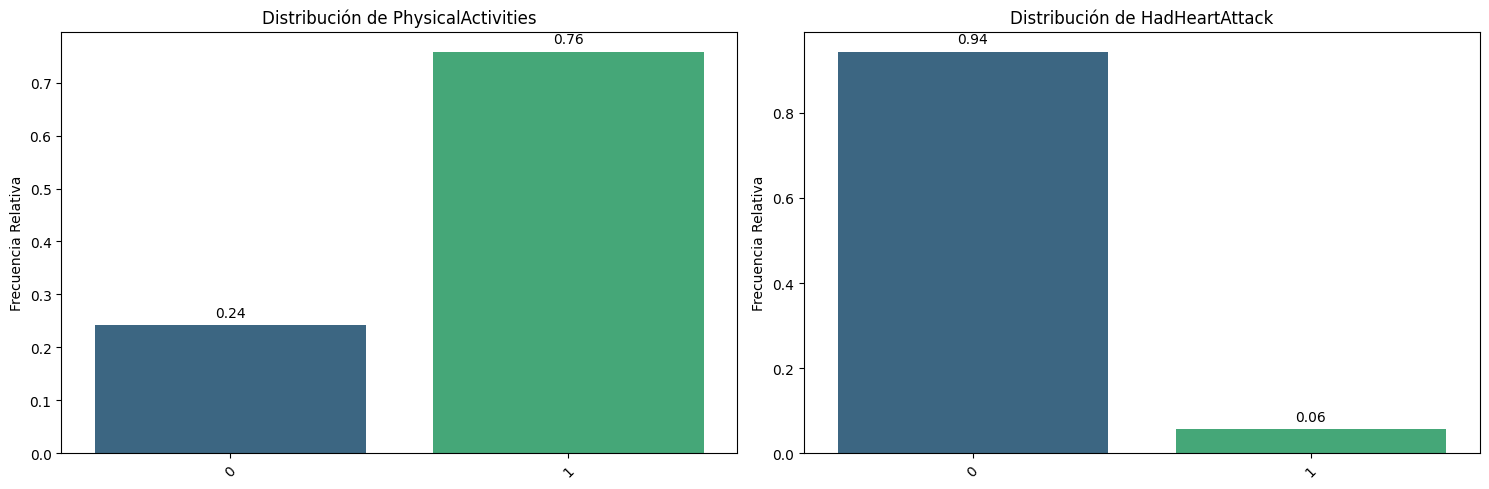

In [285]:
# PhysicalActivities vs HadHeartAttack
# Miramos las variables por separado

pinta_distribucion_categoricas(df,["PhysicalActivities", "HadHeartAttack"],
                               relativa=True,
                               mostrar_valores=True
                               )

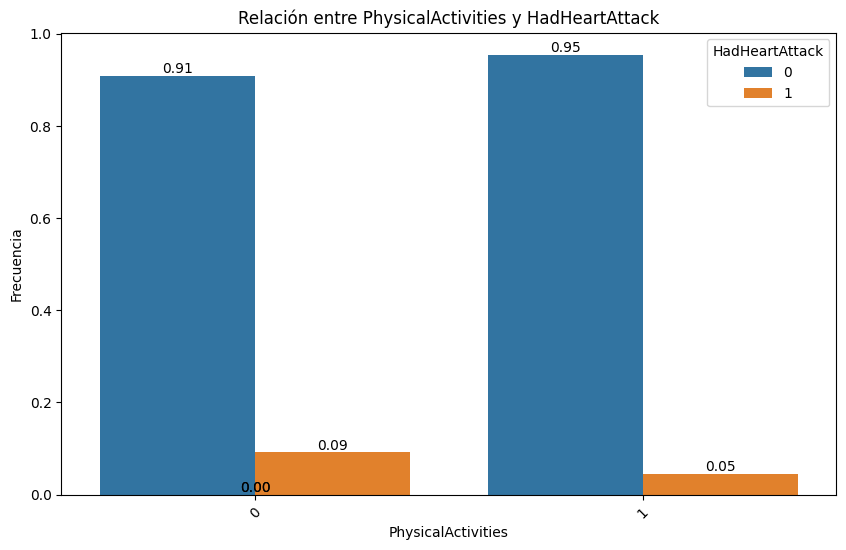

In [286]:
# Miramos su relación

plot_categorical_relationship_fin(df,
                                  "PhysicalActivities",
                                  "HadHeartAttack",
                                  relative_freq=True,
                                  show_values=True
                                  )

¿El porcentaje de "Yes" (1) en HadHeartAttack aumenta en personas sin actividad física?

Sí.

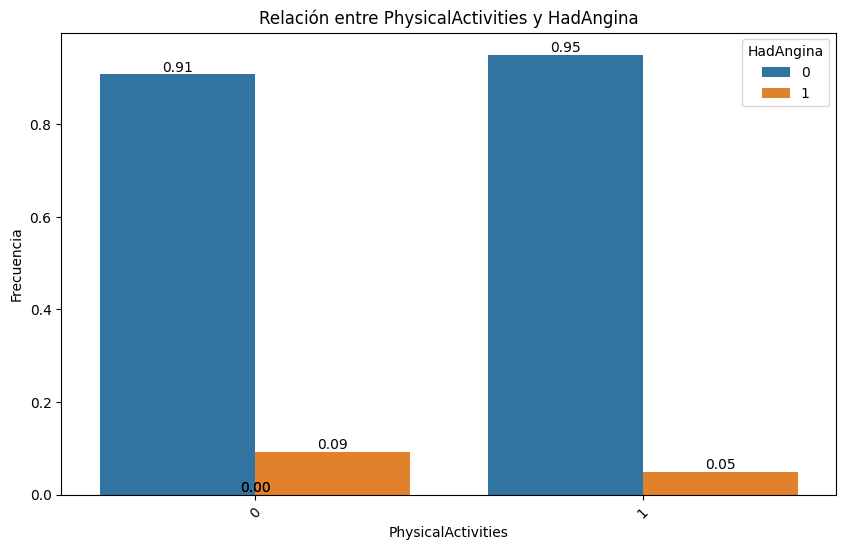

In [287]:
# Physical Activities vs HadAngina
# Miramos su relación

plot_categorical_relationship_fin(df,
                                  "PhysicalActivities",
                                  "HadAngina",
                                  relative_freq=True,
                                  show_values=True
                                  )

¿El porcentaje de "Yes" (1) en HadAngina aumenta en personas sin actividad física?

Sí.

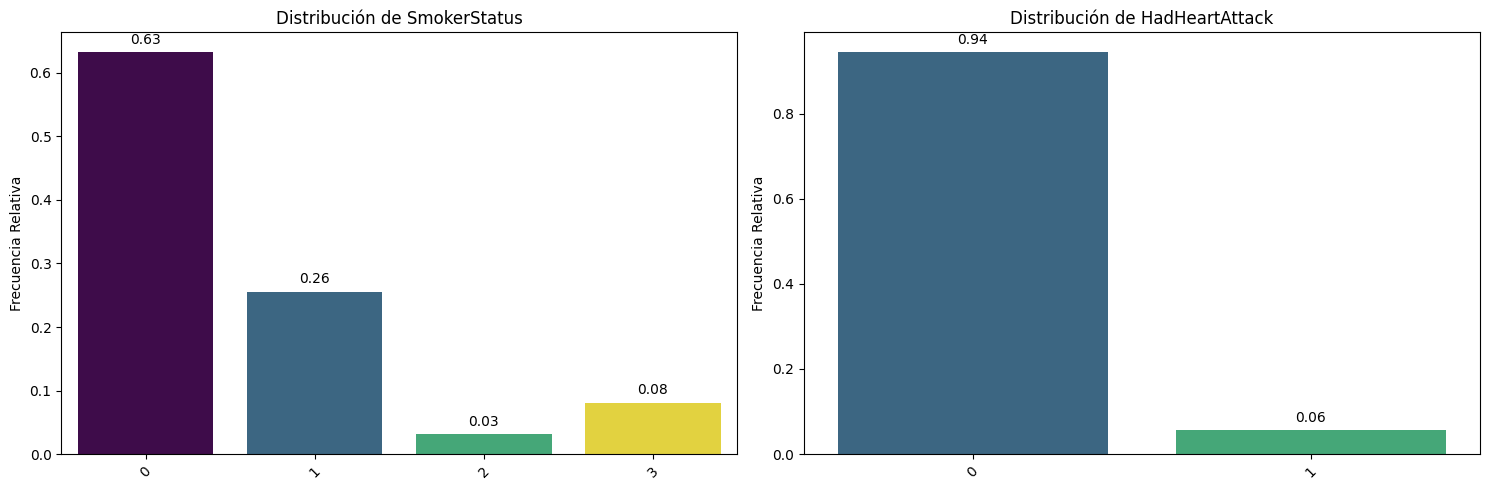

In [288]:
# SmokerStatus vs HadHeartAttack
# Miramos las variables por separado

pinta_distribucion_categoricas(df,["SmokerStatus", "HadHeartAttack"],
                               relativa=True,
                               mostrar_valores=True
                               )

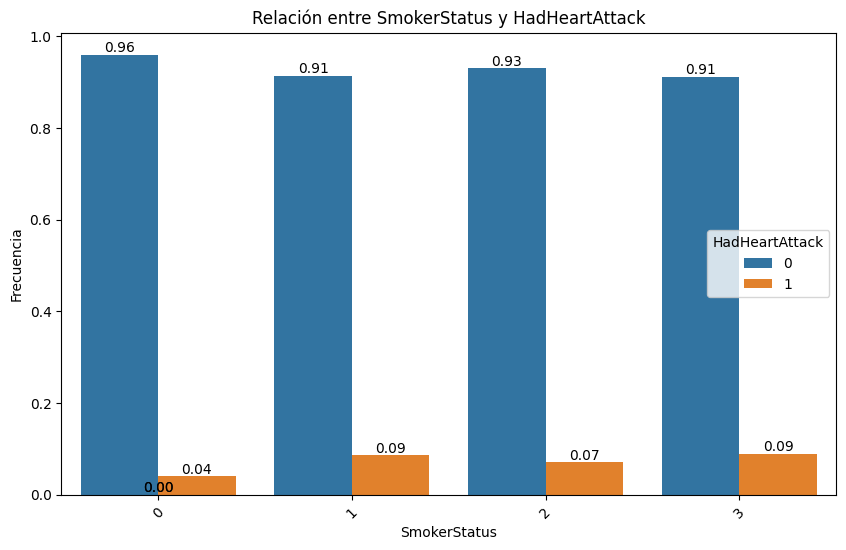

In [289]:
# Miramos su relación

plot_categorical_relationship_fin(df,
                                  "SmokerStatus",
                                  "HadHeartAttack",
                                  relative_freq=True,
                                  show_values=True
                                  )

¿El porcentaje de "Yes" (1) en HadHeartAttack aumenta con la intensidad de consumo de tabaco?

Sí. Y curiosamente, en ex fumadores es mayor que en quienes fuman algunos días, e igual que en quienes fuman todos los días.

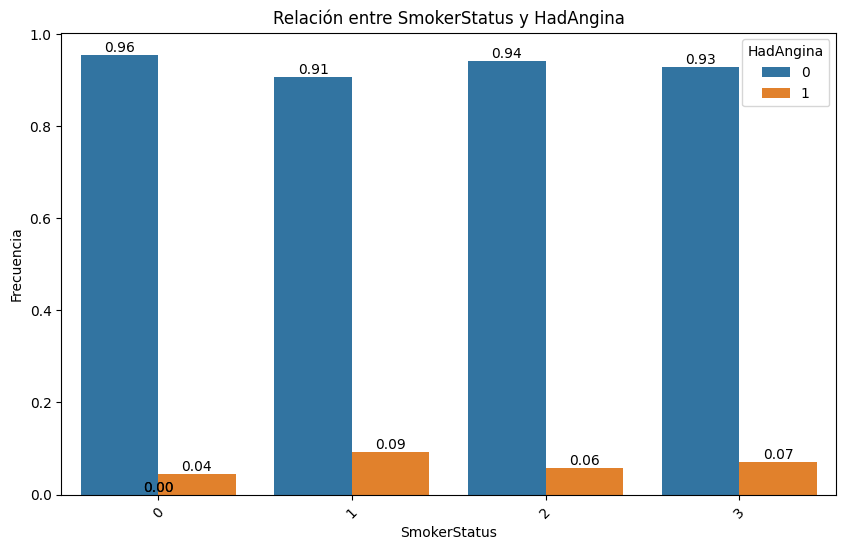

In [290]:
# SmokerStatus vs HadAngina
# Miramos su relación

plot_categorical_relationship_fin(df,
                                  "SmokerStatus",
                                  "HadAngina",
                                  relative_freq=True,
                                  show_values=True
                                  )

¿El porcentaje de "Yes" (1) en HadAngina aumenta con la intensidad de consumo de tabaco?

Sí. Y curiosamente, en ex fumadores es mayor que en quienes fuman algunos o todos los días.

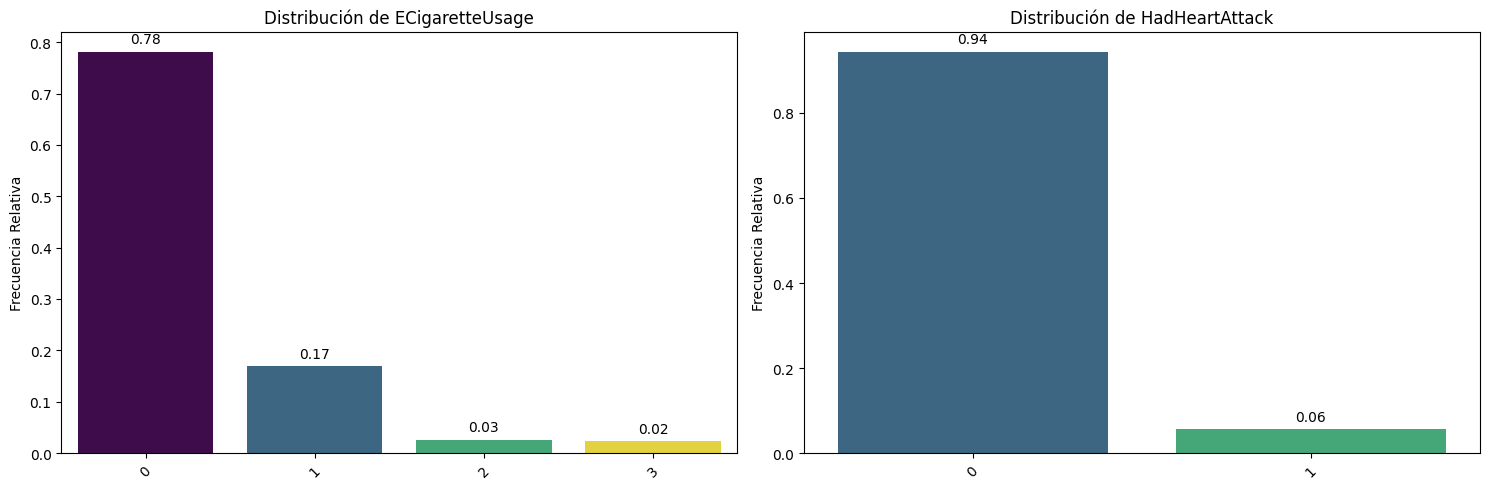

In [291]:
# ECigaretteUsage vs HadHeartAttack
# Miramos las variables por separado

pinta_distribucion_categoricas(df,["ECigaretteUsage", "HadHeartAttack"],
                               relativa=True,
                               mostrar_valores=True
                               )

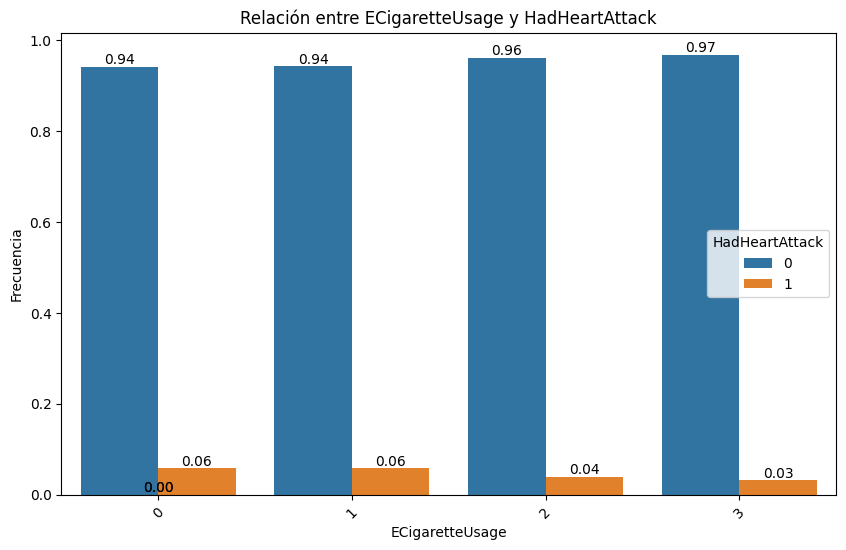

In [292]:
# Miramos su relación

plot_categorical_relationship_fin(df,
                                  "ECigaretteUsage",
                                  "HadHeartAttack",
                                  relative_freq=True,
                                  show_values=True
                                  )

¿El porcentaje de "Yes" (1) en HadHeartAttack aumenta con la intensidad de uso de cigarrillos electrónicos?

No, al contrario. Curiosamente, disminuye en quienes lo utilizan algunos o todos los días.

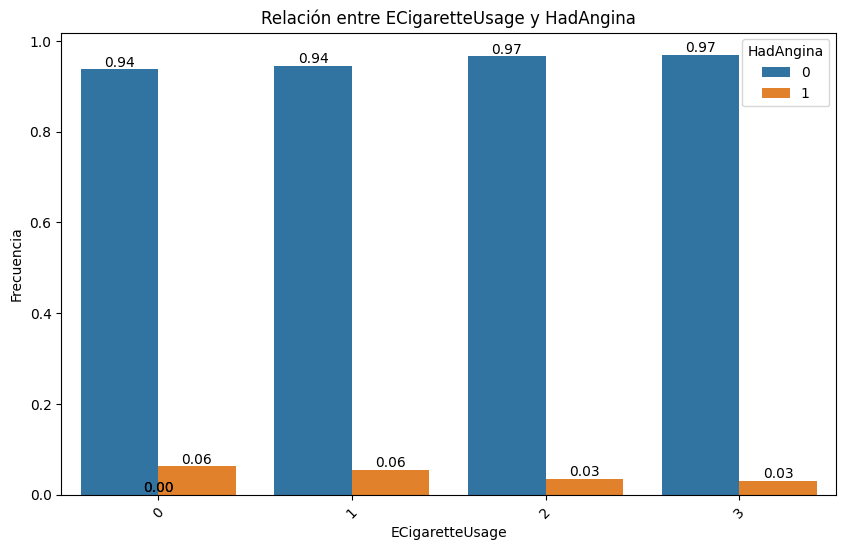

In [293]:
# ECigaretteUsage vs HadAngina
# Miramos su relación

plot_categorical_relationship_fin(df,
                                  "ECigaretteUsage",
                                  "HadAngina",
                                  relative_freq=True,
                                  show_values=True
                                  )

¿El porcentaje de "Yes" (1) en HadAngina aumenta con la intensidad de uso de cigarrillos electrónicos?

No, al contrario. Curiosamente, disminuye en quienes lo utilizan algunos o todos los días.

(2,)


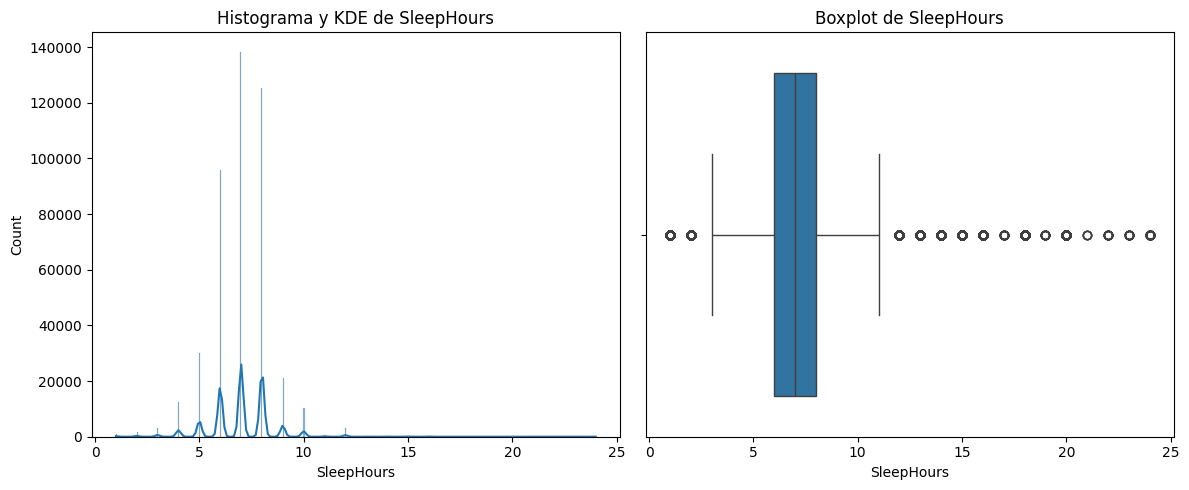

In [294]:
# Miramos la variable numérica SleepHours sola

plot_combined_graphs(
    df,
    ["SleepHours"]
)

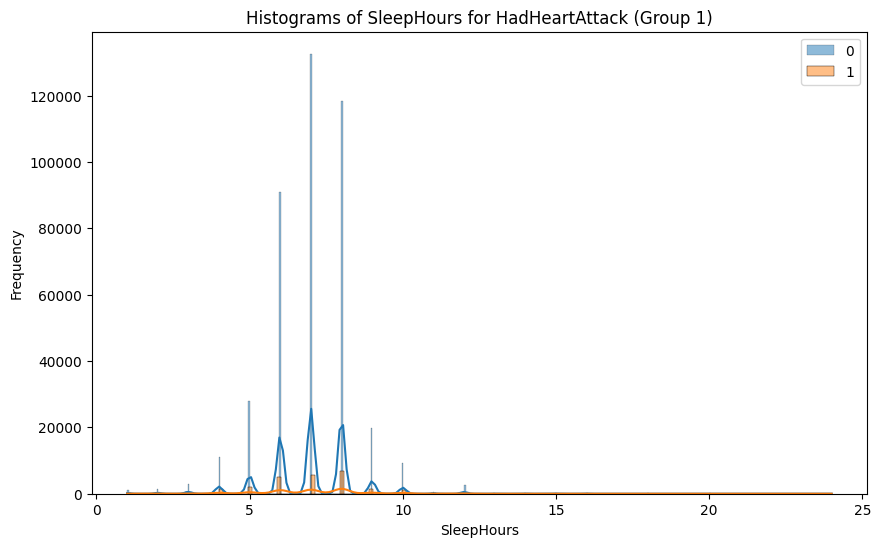

In [295]:
# La miramos separada por grupos

plot_grouped_histograms(
    df,
    cat_col="HadHeartAttack",
    num_col="SleepHours",
    group_size=2
)

¿El porcentaje de "Yes" (1) en HadHeartAttack aumenta en personas con que duermen menos?

No, no hay relación, ya que tanto el porcentaje de "Yes" (1) como el de "No" (0) aumenta de la misma manera en quienes duermen determinada cantidad de horas (entre 5 y 8 horas).

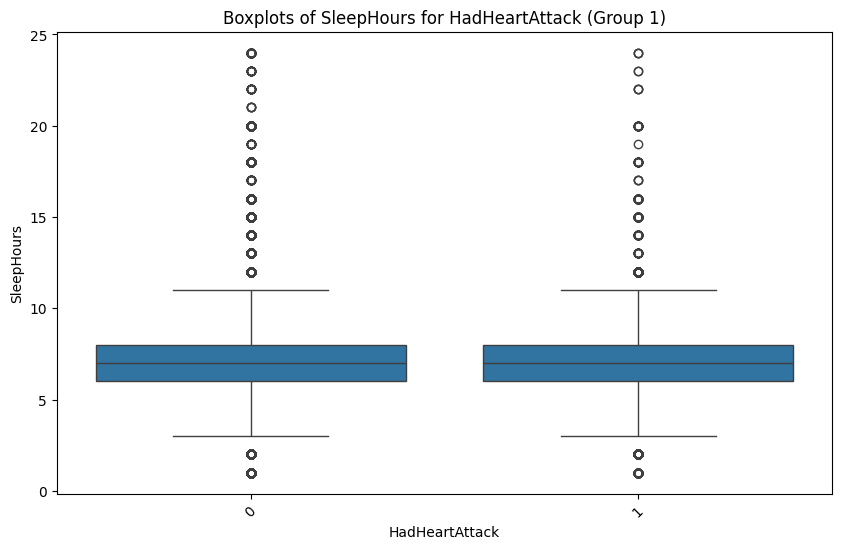

In [296]:
# Hacemos una segunda verificación de apoyo

plot_grouped_boxplots(
    df,
    cat_col="HadHeartAttack",
    num_col="SleepHours"
)

Sigue sin haber relación:
1. La mediana está a la misma altura en el grupo "Yes" (1) que en el grupo "No" (0).
2. Las cajas están a la misma altura en ambos grupos.
3. Las cajas y los bigotes son del mismo tamaño en ambos grupos.
4. Hay muchos outliers en ambos grupos. Es decir, la disperción es alta pero no favorece a ningún grupo en particular.

In [297]:
# Hacemos el test Mann-Whitney U
# 1. Separamos por grupos

grupo_yes = df.loc[df["HadHeartAttack"] == 1, "SleepHours"]
grupo_no = df.loc[df["HadHeartAttack"] == 0, "SleepHours"]

# 2. Aplicamos el test

# Si p < 0.05: Hipótesis alternativa (H₁):
# - La distribución es diferente. Hay evidencia estadística significativa.
# - Podemos afirmar relación.

# Si p > 0.05: Hipótesis nula (H₀)
# - La distribución es la misma. No hay evidencia estadística suficiente.
# - No podemos afirmar relación.

# Que no exista evidencia, no significa que no exista relación. Pero si no existe evidencia, no podemos afirmar relación.

from scipy.stats import mannwhitneyu

u_stat, p_value = mannwhitneyu(grupo_yes, grupo_no)

print("p-value:", p_value)

p-value: 0.4035175660801129


p-value: 0.4035175660801129

Como el p-value > 0.05, no rechazamos la H₀. Es decir, no hay evidencia estadística suficiente de que la cantidad de horas de sueño difiera entre los que tuvieron un ataque al corazón y los que no. Así que, esas similitudes que vimos en los boxplots e histogramas coinciden con este resultado.

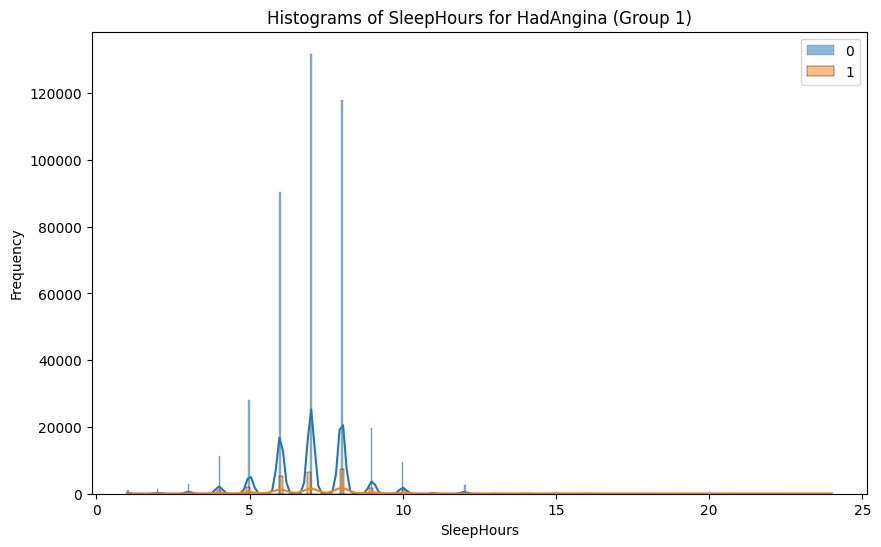

In [298]:
# Repetimos con HadAngina
# La miramos separada por grupos

plot_grouped_histograms(
    df,
    cat_col="HadAngina",
    num_col="SleepHours",
    group_size=2
)

¿El porcentaje de "Yes" (1) en HadAngina aumenta en personas con que duermen menos?

No, no hay relación, ya que tanto el porcentaje de "Yes" (1) como el de "No" (0) aumenta de la misma manera en quienes duermen determinada cantidad de horas (entre 5 y 8 horas).

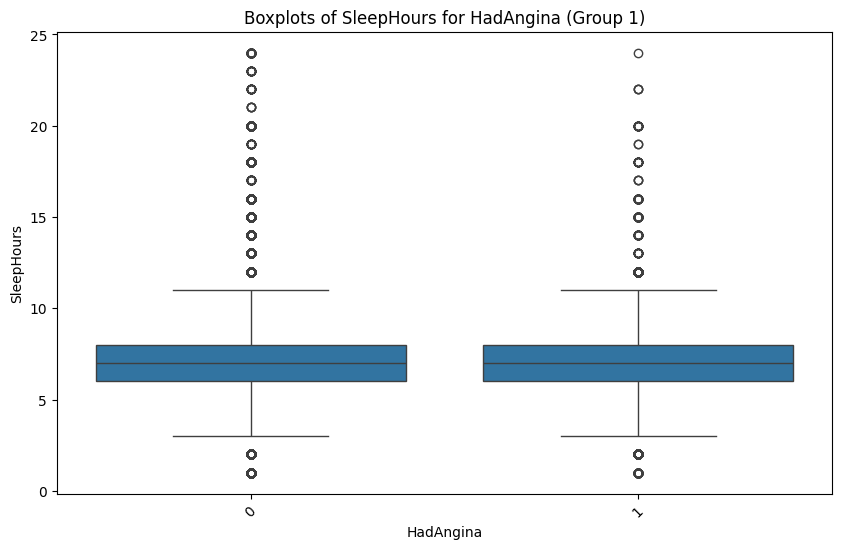

In [299]:
# Hacemos una segunda verificación de apoyo

plot_grouped_boxplots(
    df,
    cat_col="HadAngina",
    num_col="SleepHours"
)

Sigue sin haber relación:
1. La mediana está a la misma altura en el grupo "Yes" (1) que en el grupo "No" (0).
2. Las cajas están a la misma altura en ambos grupos.
3. Las cajas y los bigotes son del mismo tamaño en ambos grupos.
4. Hay muchos outliers en ambos grupos. Es decir, la disperción es alta pero no favorece a ningún grupo en particular.

In [300]:
grupo_yes = df.loc[df["HadAngina"] == 1, "SleepHours"]
grupo_no = df.loc[df["HadAngina"] == 0, "SleepHours"]

u_stat, p_value = mannwhitneyu(grupo_yes, grupo_no)

print("p-value:", p_value)

p-value: 1.3641802983061341e-06


p-value = 1.3641802983061337e-06

¿Qué significa e-06? 

El "e-06" significa ×10⁻⁶, es decir:

1.36 × 10 − 6 = 0.00000136

Como el p-value < 0.05, rechazamos la H₀. Es decir, hay evidencia estadística de que la cantidad de horas de sueño difiere significativamente entre los que tuvieron un ataque al corazón y los que no. En este caso, las simulitudes que vimos en los boxplots e histogramas no coinciden con el resultado. El boxplot muestra la distribución visual (mediana, cuartiles y posibles outliers). Dos grupos pueden parecer simulares a ojo, pero un test estadístico como Mann-Whitney tiene en cuenta todas las observaciones, sus rangos y tamaños de muestra. Si uno de los grupos tiene muchos más datos o hay diferencias sutiles en los rangos, el p-value puede ser muy distinto aunque los boxplots se vean parecidos. No debemos fiarnos solo de la forma de las cajas. El test puede detectar diferencias sutiles que visualmente no saltan a la vista. Siempre debemos combinar visualización + test estadístico para tomar decisiones.

## Hipótesis 4

IMC y diabetes están relacionados con antecedentes cardiovasculares.

Variables:
1. BMI_category
2. HadDiabetes_binary
3. HadHeartAttack
4. HadAngina

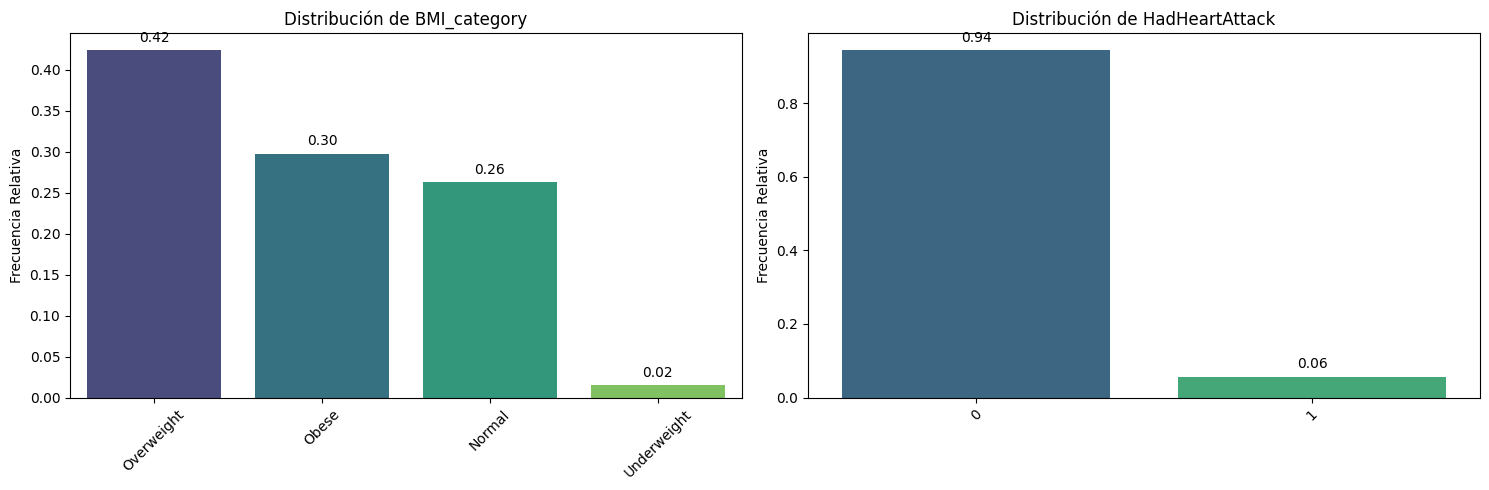

In [301]:
# BMI_category vs HadHeartAttack
# Miramos las variables por separado

pinta_distribucion_categoricas(df,["BMI_category", "HadHeartAttack"],
                               relativa=True,
                               mostrar_valores=True
                               )

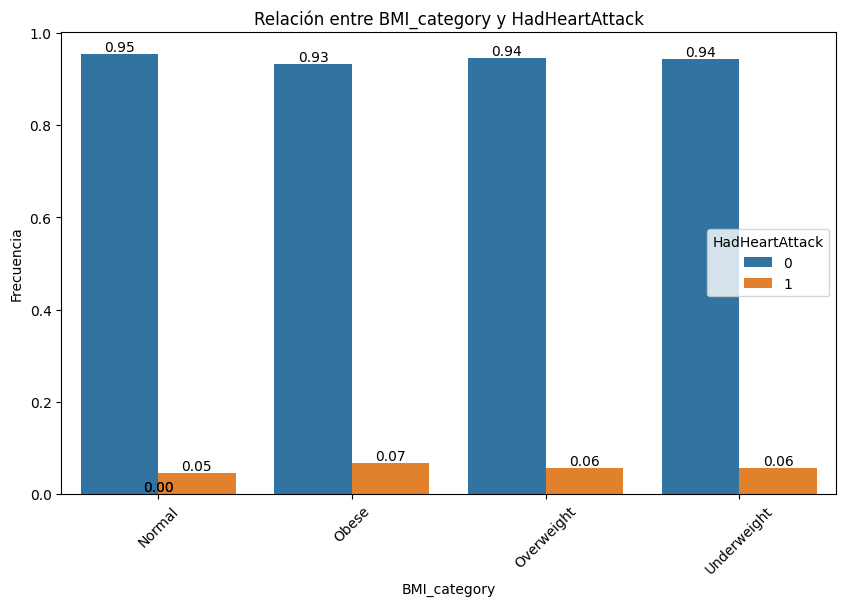

In [302]:
# Miramos su relación

plot_categorical_relationship_fin(df,
                                  "BMI_category",
                                  "HadHeartAttack",
                                  relative_freq=True,
                                  show_values=True
                                  )

¿El porcentaje de "Yes" (1) en HadHeartAttack aumenta con el peso?

Sí. Y curiosamente, también aumenta en quienes están por debajo de su peso, ya que tampoco son personas sanas.

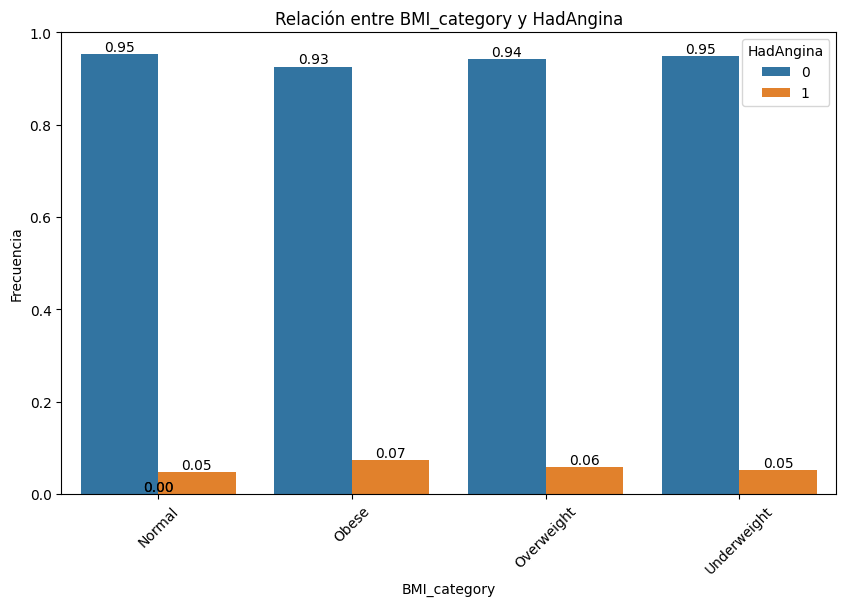

In [303]:
# BMI_category vs HadAngina
# Miramos su relación

plot_categorical_relationship_fin(df,
                                  "BMI_category",
                                  "HadAngina",
                                  relative_freq=True,
                                  show_values=True
                                  )

¿El porcentaje de "Yes" (1) en HadAngina aumenta con el peso?

Sí.

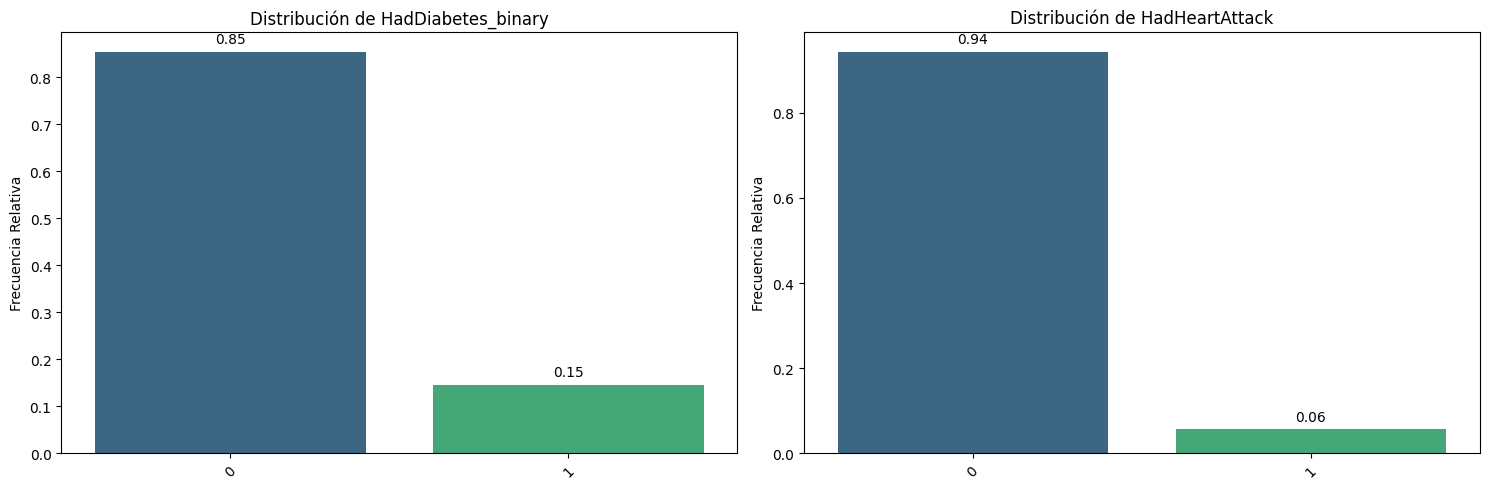

In [304]:
# Diabetes_binary vs HadHeartAttack
# Miramos las variables por separado

pinta_distribucion_categoricas(df,["HadDiabetes_binary", "HadHeartAttack"],
                               relativa=True,
                               mostrar_valores=True
                               )

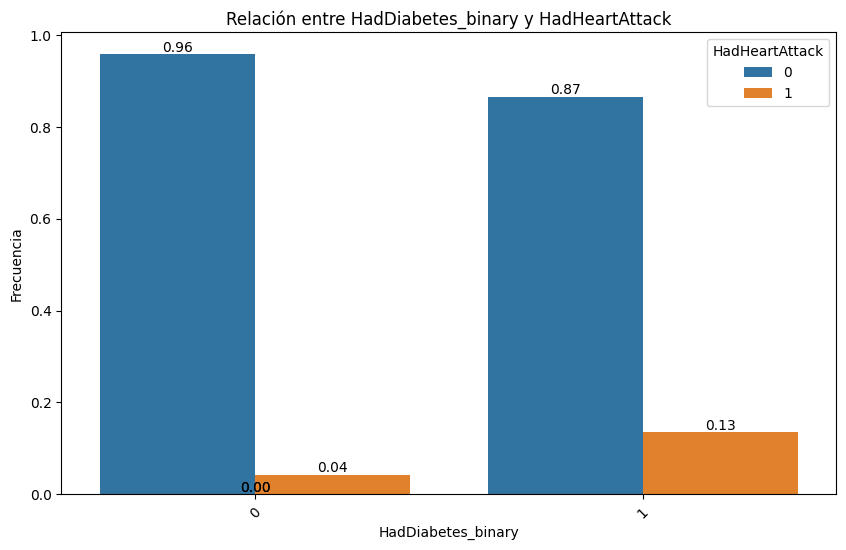

In [305]:
# Miramos su relación

plot_categorical_relationship_fin(df,
                                  "HadDiabetes_binary",
                                  "HadHeartAttack",
                                  relative_freq=True,
                                  show_values=True
                                  )

¿El porcentaje de "Yes" (1) en HadHeartAttack aumenta en personas con diabetes?

Sí.

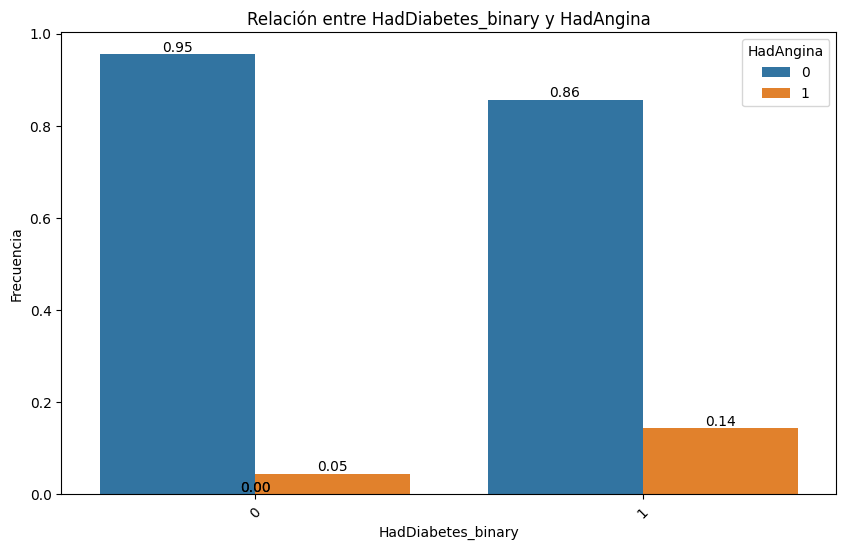

In [306]:
# HadDiabetes_binary vs HadAngina
# Miramos su relación

plot_categorical_relationship_fin(df,
                                  "HadDiabetes_binary",
                                  "HadAngina",
                                  relative_freq=True,
                                  show_values=True
                                  )

¿El porcentaje de "Yes" (1) en HadAngina aumenta en personas con diabetes?

Sí.

## Resumen

### Hipótesis 1

#### Observaciones visuales:
1. El porcentaje de Yes en HadHeartAttack aumenta conforme GeneralHealth empeora.
2. El porcentaje de Yes en HadAngina también.

#### Conclusión:  
La hipótesis 1 queda **confirmada visualmente**. Las personas con peor salud general presentan mayor riesgo de enfermedades cardiovasculares.

### Hipótesis 2

#### Observaciones visuales:
1. Sex vs HadHeartAttack/HadAngina:
Hay diferencias leves entre hombres y mujeres, pero no son estadísticamente significativas para ambas variables.
2. Edad vs HadHeartAttack/HadAngina: 
El porcentaje de Yes aumenta con la edad para ambas variables.

#### Conclusión:  
La personas mayores presentan mayor riesgo de enfermedades cardiovasculares. El sexo muestra diferencias leves pero no significativas.

### Hipótesis 3

#### Observacions visuales:
1. PhysicalActivities vs HadHeartAttack/HadAngina: 
El porcentaje de Yes aumenta en quienes no hacen actividad física para ambas variables.
2. SmokerStatus vs HadHeartAttack/HadAngina:
El procentaje de Yes aumenta con el consumo de tabaco para ambas variables. Curiosamente, los ex fumadores muestran un riesgo similar o mayor que quienes fuman algunos días para ambas variables.
3. ECigaretteUsage vs HadHeartAttack/HadAngina:
No hay relación positiva. Incluso, el porcentaje de Yes disminuye en usuarios frecuentes para ambas variables.
4. SleepHours vs HadHeartAttack:
- Boxplots: mediana y rangos similares entre grupos Yes y No a simple vista.
- Outliers: presentes en ambos grupos.
- Test Mann-Whitney U: 
p-value = 0.4035 > 0.05
No hay evidencia estadísitica de diferencia.

SleepHours vs HadAngina:
- Boxplots: mediana y rangos similares entre grupos Yes y No a simple vista.
- Outliers: presentes en ambos grupos.
- Test Mann-Whitney U:
p-value = 0.00000136 < 0.05
Sí hay evidencia estadística de diferencia.
Aunque visualmente no se aprecian diferencias claras, el test detecta una diferencia sutil significativa.

#### Conclusión:  
1. PhysicalActivities y SmokerStatus muestran relación positiva con el riesgo de enfermedades cardiovasculares.
2. ECigaretteUsage no parece aumentar el riesgo.
3. SleepHours tiene resultados mixtos: visualmente no se nota diferencia, pero estadísticamente hay relación positiva para HadAngina, no así para HadHeartAttack.
4. Recomendación: combinar siempre visualización + test estadístico.

### Hipótesis 4

#### Observcaciones visuales:
1. BMI_category vs HadHeartAttack/HadAngina: 
El porcentaje de Yes aumenta con el peso para ambas variables. Incluso, aumenta en personas que están por debajo de su peso, indicando otros factores de riesgo en ambas variables.
2. Diabetes_binary vs HadHeartAttack/HadAngina: 
El porcentaje de Yes aumenta en quienes tienen diabetes para ambas variables.

#### Conclusión:  
La hipótesis 4 queda **confirmada visualmente**. Personas con el IMC alto como con diabetes presentan mayor riesgo de enfermedades cardiovasculares.